<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Ganjil 2022/2023

Fakultas Ilmu Komputer, Universitas Indonesia

##**Tugas Akhir KASDD**

####**Kelompok SAFA TUH - Daegu Apartment**
</center>

#####**Anggota Kelompok SAFA TUH:**
1. Aiko Sulaiman (2006522190)
2. Dzariyanti Asha Savitri (2006596623)
3. Fasya Prandari Shafira (2006483605)
4. Sophie Andira Cindani Gardian (2006597443)


In [ ]:
# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = ["https://analyticsindiamag.com/how-to-detect-and-treat-outliers-in-categorical-data/"]

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from collections import Counter
from numpy import where
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, SVMSMOTE, ADASYN
from imblearn.under_sampling import NearMiss
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.decomposition import PCA
import plotly.graph_objects as go

# **A. EDA dan Preprocessing**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/06_DaeguApartments.csv')

total_rows, total_attributes = data.shape
print('Jumlah data:', total_rows)
print("Jumlah atribut:", total_attributes)

data.head()

Jumlah data: 5891
Jumlah atribut: 31


,SalePrice,YearBuilt,YrSold,MonthSold,Size(sqf),Floor,HallwayType,HeatingType,AptManageType,N_Parkinglot(Ground),...,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(Park),N_SchoolNearBy(Elementary),N_SchoolNearBy(Middle),N_SchoolNearBy(High),N_SchoolNearBy(University),N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total),FamilyFriendly
0,141592,2006,2007,8,814,3,terraced,individual_heating,management_in_trust,111,...,1,0,3,2,2,2,5,6,9,0.0
1,51327,1985,2007,8,587,8,corridor,individual_heating,self_management,80,...,2,1,2,1,1,0,3,12,4,1.0
2,48672,1985,2007,8,587,6,corridor,individual_heating,self_management,80,...,2,1,2,1,1,0,3,12,4,1.0
3,380530,2006,2007,8,2056,8,terraced,individual_heating,management_in_trust,249,...,0,0,2,2,1,2,5,3,7,NaN
4,221238,1993,2007,8,1761,3,mixed,individual_heating,management_in_trust,523,...,5,0,4,3,5,5,4,14,17,0.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5891 entries, 0 to 5890
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   SalePrice                           5891 non-null   int64  
 1   YearBuilt                           5891 non-null   int64  
 2   YrSold                              5891 non-null   int64  
 3   MonthSold                           5891 non-null   int64  
 4   Size(sqf)                           5891 non-null   int64  
 5   Floor                               5891 non-null   int64  
 6   HallwayType                         5891 non-null   object 
 7   HeatingType                         5891 non-null   object 
 8   AptManageType                       5891 non-null   object 
 9   N_Parkinglot(Ground)                5891 non-null   int64  
 10  N_Parkinglot(Basement)              5891 non-null   int64  
 11  TimeToBusStop                       5891 no

In [ ]:
data.describe()

,SalePrice,YearBuilt,YrSold,MonthSold,Size(sqf),Floor,N_Parkinglot(Ground),N_Parkinglot(Basement),N_APT,N_manager,...,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(Park),N_SchoolNearBy(Elementary),N_SchoolNearBy(Middle),N_SchoolNearBy(High),N_SchoolNearBy(University),N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total),FamilyFriendly
count,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,...,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5739.000000
mean,221218.112545,2002.967408,2012.691563,6.160244,955.569173,12.026311,195.883551,570.761670,5.613648,6.310304,...,1.941266,0.654218,3.022407,2.417756,2.659311,2.764726,5.809540,9.870820,10.864200,0.231051
std,106384.186446,8.811782,2.905488,3.387752,382.464050,7.548743,218.597210,408.621075,2.811831,3.174088,...,2.201392,0.658320,0.954575,1.037898,1.556041,1.489289,2.330804,3.450319,4.438513,0.421542
min,32743.000000,1978.000000,2007.000000,1.000000,135.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,144247.000000,1993.000000,2010.000000,3.000000,644.000000,6.000000,11.000000,184.000000,3.000000,5.000000,...,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,4.000000,8.000000,7.000000,0.000000
50%,207964.000000,2006.000000,2013.000000,6.000000,910.000000,11.000000,100.000000,536.000000,7.000000,6.000000,...,1.000000,1.000000,3.000000,3.000000,2.000000,2.000000,5.000000,9.000000,10.000000,0.000000
75%,291150.000000,2008.000000,2015.000000,9.000000,1149.000000,17.000000,249.000000,798.000000,8.000000,8.000000,...,5.000000,1.000000,4.000000,3.000000,4.000000,4.000000,7.000000,13.000000,15.000000,0.000000
max,585840.000000,2015.000000,2017.000000,12.000000,2337.000000,43.000000,713.000000,1321.000000,13.000000,14.000000,...,5.000000,2.000000,6.000000,4.000000,5.000000,5.000000,10.000000,16.000000,17.000000,1.000000


In [ ]:
data.describe(include=['object'])

,HallwayType,HeatingType,AptManageType,TimeToBusStop,TimeToSubway,SubwayStation
count,5891,5891,5891,5891,5891,5891
unique,3,2,2,3,5,8
top,terraced,individual_heating,management_in_trust,0~5min,0-5min,Kyungbuk_uni_hospital
freq,3564,5591,5542,4509,2759,1644


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data.isnull().sum()

SalePrice                               0
YearBuilt                               0
YrSold                                  0
MonthSold                               0
Size(sqf)                               0
Floor                                   0
HallwayType                             0
HeatingType                             0
AptManageType                           0
N_Parkinglot(Ground)                    0
N_Parkinglot(Basement)                  0
TimeToBusStop                           0
TimeToSubway                            0
N_APT                                   0
N_manager                               0
N_elevators                             0
SubwayStation                           0
N_FacilitiesNearBy(PublicOffice)        0
N_FacilitiesNearBy(Hospital)            0
N_FacilitiesNearBy(Dpartmentstore)      0
N_FacilitiesNearBy(Mall)                0
N_FacilitiesNearBy(ETC)                 0
N_FacilitiesNearBy(Park)                0
N_SchoolNearBy(Elementary)        

In [ ]:
print("Persentase missing value pada kolom FamilyFriendly: ", 152/len(data)*100)

Persentase missing value pada kolom FamilyFriendly:  2.580207095569513


#### Handling Missing Values

Karena persentase missing value berada dalam scope acceptable yaitu dibawah 5%, maka kami akan melakukan drop missing values tersebut

In [ ]:
data.dropna(axis=0,inplace=True);

In [ ]:
data.isnull().sum()

SalePrice                             0
YearBuilt                             0
YrSold                                0
MonthSold                             0
Size(sqf)                             0
Floor                                 0
HallwayType                           0
HeatingType                           0
AptManageType                         0
N_Parkinglot(Ground)                  0
N_Parkinglot(Basement)                0
TimeToBusStop                         0
TimeToSubway                          0
N_APT                                 0
N_manager                             0
N_elevators                           0
SubwayStation                         0
N_FacilitiesNearBy(PublicOffice)      0
N_FacilitiesNearBy(Hospital)          0
N_FacilitiesNearBy(Dpartmentstore)    0
N_FacilitiesNearBy(Mall)              0
N_FacilitiesNearBy(ETC)               0
N_FacilitiesNearBy(Park)              0
N_SchoolNearBy(Elementary)            0
N_SchoolNearBy(Middle)                0


In [ ]:
total_rows, total_attributes = data.shape
print('Jumlah data:', total_rows)
print("Jumlah atribut:", total_attributes)

Jumlah data: 5739
Jumlah atribut: 31


Dapat dilihat atas, bahwa null value sudah kami drop sehingga row dataset sudah berkurang menjadi 5739

In [ ]:
data.duplicated()

0       False
1       False
2       False
4       False
5       False
        ...  
5886    False
5887    False
5888    False
5889    False
5890    False
Length: 5739, dtype: bool

In [ ]:
print("Jumlah duplikasi data : " + str(data.duplicated().sum()))

Jumlah duplikasi data : 315


#### Handling Duplikasi Data

In [ ]:
data_noDuplicate = data.drop_duplicates(inplace = False)
print("Jumlah duplikasi data : " + str(data_noDuplicate.duplicated().sum()))

Jumlah duplikasi data : 0


In [ ]:
# mencari quartile
Q3 = data_noDuplicate.quantile(0.75)
Q1 = data_noDuplicate.quantile(0.25)
IQR = Q3-Q1

Jumlah_Outlier = []

for col in data_noDuplicate.select_dtypes(np.number).columns:
    outliers = ((data_noDuplicate[col] < (Q1[col] - 1.5 * IQR[col])) | (data_noDuplicate[col] > (Q3[col] + 1.5 * IQR[col]))).sum()
    Jumlah_Outlier.append([col, outliers, outliers/len(data_noDuplicate)])

indexOutput = list(range(0, len(Jumlah_Outlier)))

pd.DataFrame(Jumlah_Outlier, columns=['Column', 'Outlier','persentase'],index=indexOutput).sort_values(by=['persentase'], ascending = False,ignore_index=True)

,Column,Outlier,persentase
0,FamilyFriendly,1224,0.225664
1,N_FacilitiesNearBy(Mall),914,0.168510
2,N_manager,559,0.103060
3,N_Parkinglot(Ground),288,0.053097
4,N_SchoolNearBy(Middle),231,0.042588
5,Size(sqf),101,0.018621
6,N_FacilitiesNearBy(Total),63,0.011615
7,Floor,53,0.009771
8,SalePrice,1,0.000184
9,N_APT,0,0.000000


In [ ]:
def countplot(column):
  plt.figure(figsize=(10,10))
  plt.yticks(size=10)
  #to increase x ticks
  plt.xticks(size=10)
  return sns.countplot(y= column, data=data_noDuplicate)

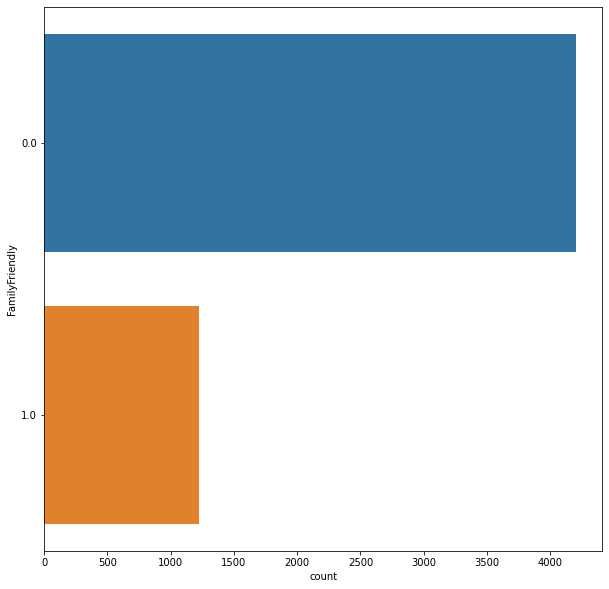

In [ ]:
countplot('FamilyFriendly')

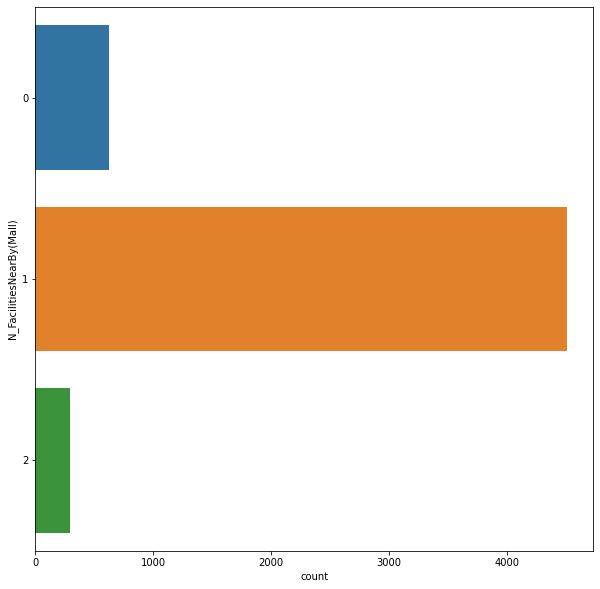

In [ ]:
countplot('N_FacilitiesNearBy(Mall)')

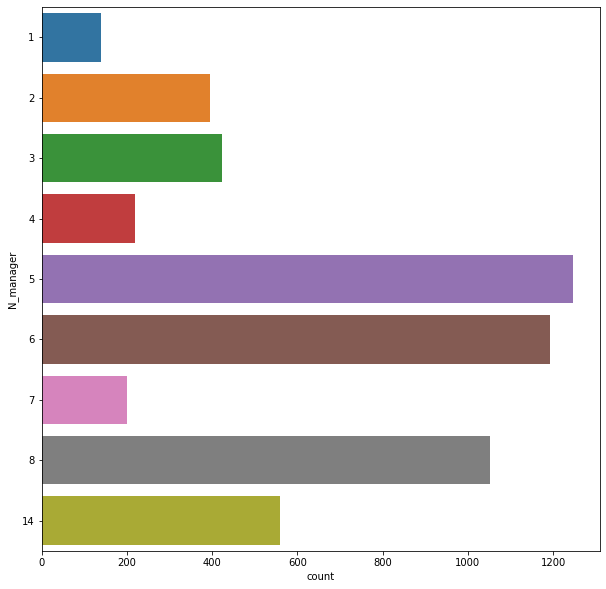

In [ ]:
countplot('N_manager')

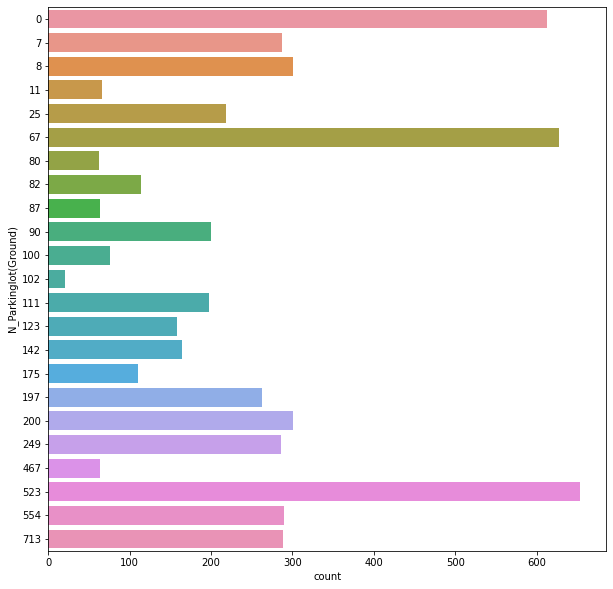

In [ ]:
countplot('N_Parkinglot(Ground)')

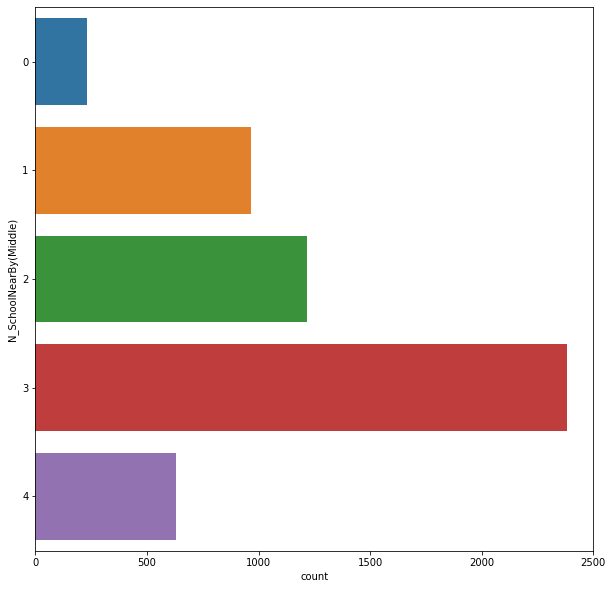

In [ ]:
countplot('N_SchoolNearBy(Middle)')

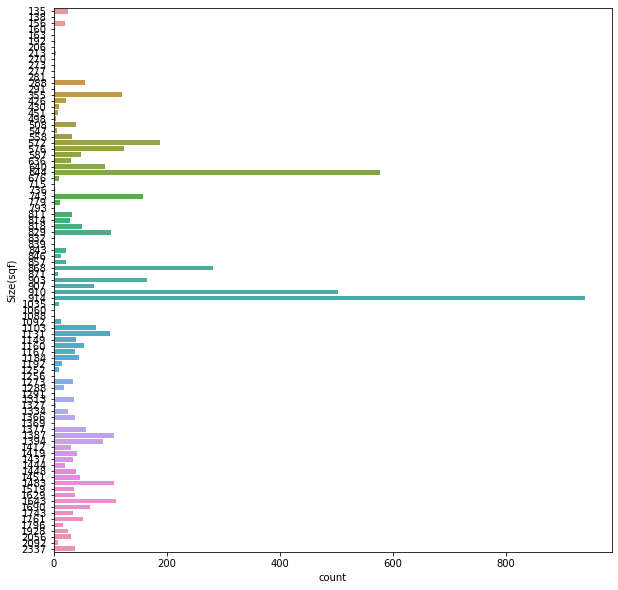

In [ ]:
countplot('Size(sqf)')

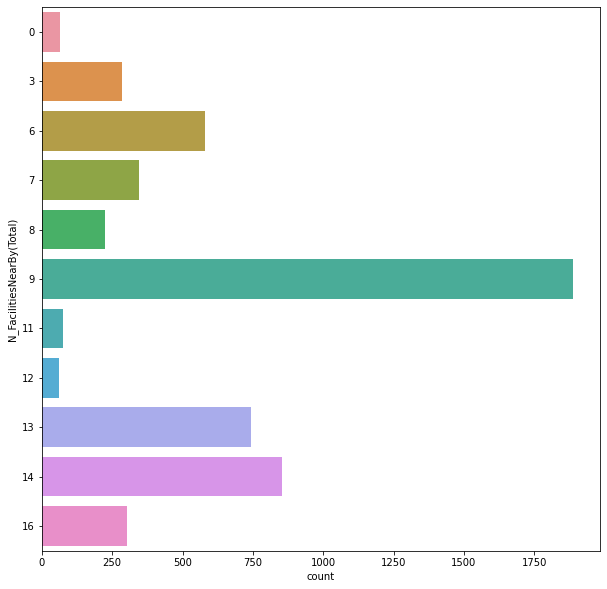

In [ ]:
countplot('N_FacilitiesNearBy(Total)')

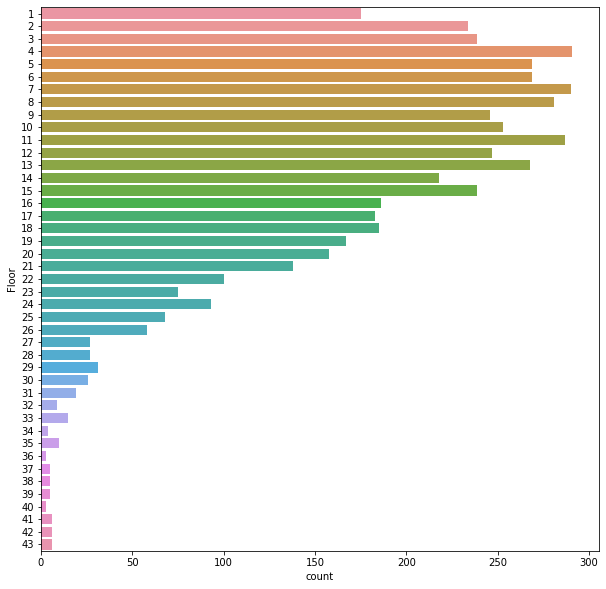

In [ ]:
countplot('Floor')

#### Handling Outliers

In [ ]:
data_noDuplicate.skew(axis = 0, skipna = True)

<ipython-input-31-6d459a8af537>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_noDuplicate.skew(axis = 0, skipna = True)


SalePrice                             0.349117
YearBuilt                            -0.730851
YrSold                               -0.131061
MonthSold                             0.071887
Size(sqf)                             0.834036
Floor                                 0.781932
N_Parkinglot(Ground)                  1.026461
N_Parkinglot(Basement)                0.347045
N_APT                                -0.027532
N_manager                             1.071856
N_elevators                           0.138702
N_FacilitiesNearBy(PublicOffice)     -0.152479
N_FacilitiesNearBy(Hospital)          0.588813
N_FacilitiesNearBy(Dpartmentstore)    0.184351
N_FacilitiesNearBy(Mall)             -0.462576
N_FacilitiesNearBy(ETC)               0.542266
N_FacilitiesNearBy(Park)              0.535536
N_SchoolNearBy(Elementary)           -0.209909
N_SchoolNearBy(Middle)               -0.484264
N_SchoolNearBy(High)                  0.261275
N_SchoolNearBy(University)            0.272332
N_FacilitiesI

In [ ]:
# Mengurutkan data untuk mencari quartil.
def find_RLB(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    RLB = Q1 - 1.5*IQR
    return RLB

def find_RUB(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    RUB = Q3 + 1.5*IQR
    return RUB

data_noOutlier = data_noDuplicate.copy();
data_parkinglot = data_noOutlier['N_Parkinglot(Ground)']
data_noOutlier.loc[data_parkinglot > find_RUB(data_parkinglot), 'N_Parkinglot(Ground)'] = np.nan
data_noOutlier.loc[data_parkinglot < find_RLB(data_parkinglot), 'N_Parkinglot(Ground)'] = np.nan
median1 = data_parkinglot.median(skipna=True)
print(median1)
data_noOutlier['N_Parkinglot(Ground)'].fillna(median1,inplace=True)


data_manager = data_noOutlier['N_manager']
data_noOutlier.loc[data_manager > find_RUB(data_manager), 'N_manager'] = np.nan
data_noOutlier.loc[data_manager < find_RLB(data_manager), 'N_manager'] = np.nan
median2 = data_manager.median(skipna=True)
print(median2)
data_noOutlier['N_manager'].fillna(median2,inplace=True)

111.0
6.0


In [ ]:
# mencari quartile
Q3 = data_noDuplicate.quantile(0.75) #ini tadi sebelumnya data_noOutlier
Q1 = data_noDuplicate.quantile(0.25)
IQR = Q3-Q1

Jumlah_Outlier = []

for col in data_noOutlier.select_dtypes(np.number).columns:
    outliers = ((data_noOutlier[col] < (Q1[col] - 1.5 * IQR[col])) | (data_noOutlier[col] > (Q3[col] + 1.5 * IQR[col]))).sum()
    Jumlah_Outlier.append([col, outliers, outliers/len(data_noOutlier)])

indexOutput = list(range(0, len(Jumlah_Outlier)))

pd.DataFrame(Jumlah_Outlier, columns=['Column', 'Outlier','persentase'],index=indexOutput).sort_values(by=['persentase'], ascending = False,ignore_index=True)

,Column,Outlier,persentase
0,FamilyFriendly,1224,0.225664
1,N_FacilitiesNearBy(Mall),914,0.168510
2,N_SchoolNearBy(Middle),231,0.042588
3,Size(sqf),101,0.018621
4,N_FacilitiesNearBy(Total),63,0.011615
5,Floor,53,0.009771
6,SalePrice,1,0.000184
7,N_Parkinglot(Basement),0,0.000000
8,N_APT,0,0.000000
9,N_SchoolNearBy(Total),0,0.000000


In [ ]:
data_noOutlier.skew(axis = 0, skipna = True)

<ipython-input-34-06c3dfd9b258>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_noOutlier.skew(axis = 0, skipna = True)


SalePrice                             0.349117
YearBuilt                            -0.730851
YrSold                               -0.131061
MonthSold                             0.071887
Size(sqf)                             0.834036
Floor                                 0.781932
N_Parkinglot(Ground)                  1.137216
N_Parkinglot(Basement)                0.347045
N_APT                                -0.027532
N_manager                            -0.514319
N_elevators                           0.138702
N_FacilitiesNearBy(PublicOffice)     -0.152479
N_FacilitiesNearBy(Hospital)          0.588813
N_FacilitiesNearBy(Dpartmentstore)    0.184351
N_FacilitiesNearBy(Mall)             -0.462576
N_FacilitiesNearBy(ETC)               0.542266
N_FacilitiesNearBy(Park)              0.535536
N_SchoolNearBy(Elementary)           -0.209909
N_SchoolNearBy(Middle)               -0.484264
N_SchoolNearBy(High)                  0.261275
N_SchoolNearBy(University)            0.272332
N_FacilitiesI

#### Visualisasi Heatmap Antar Feature

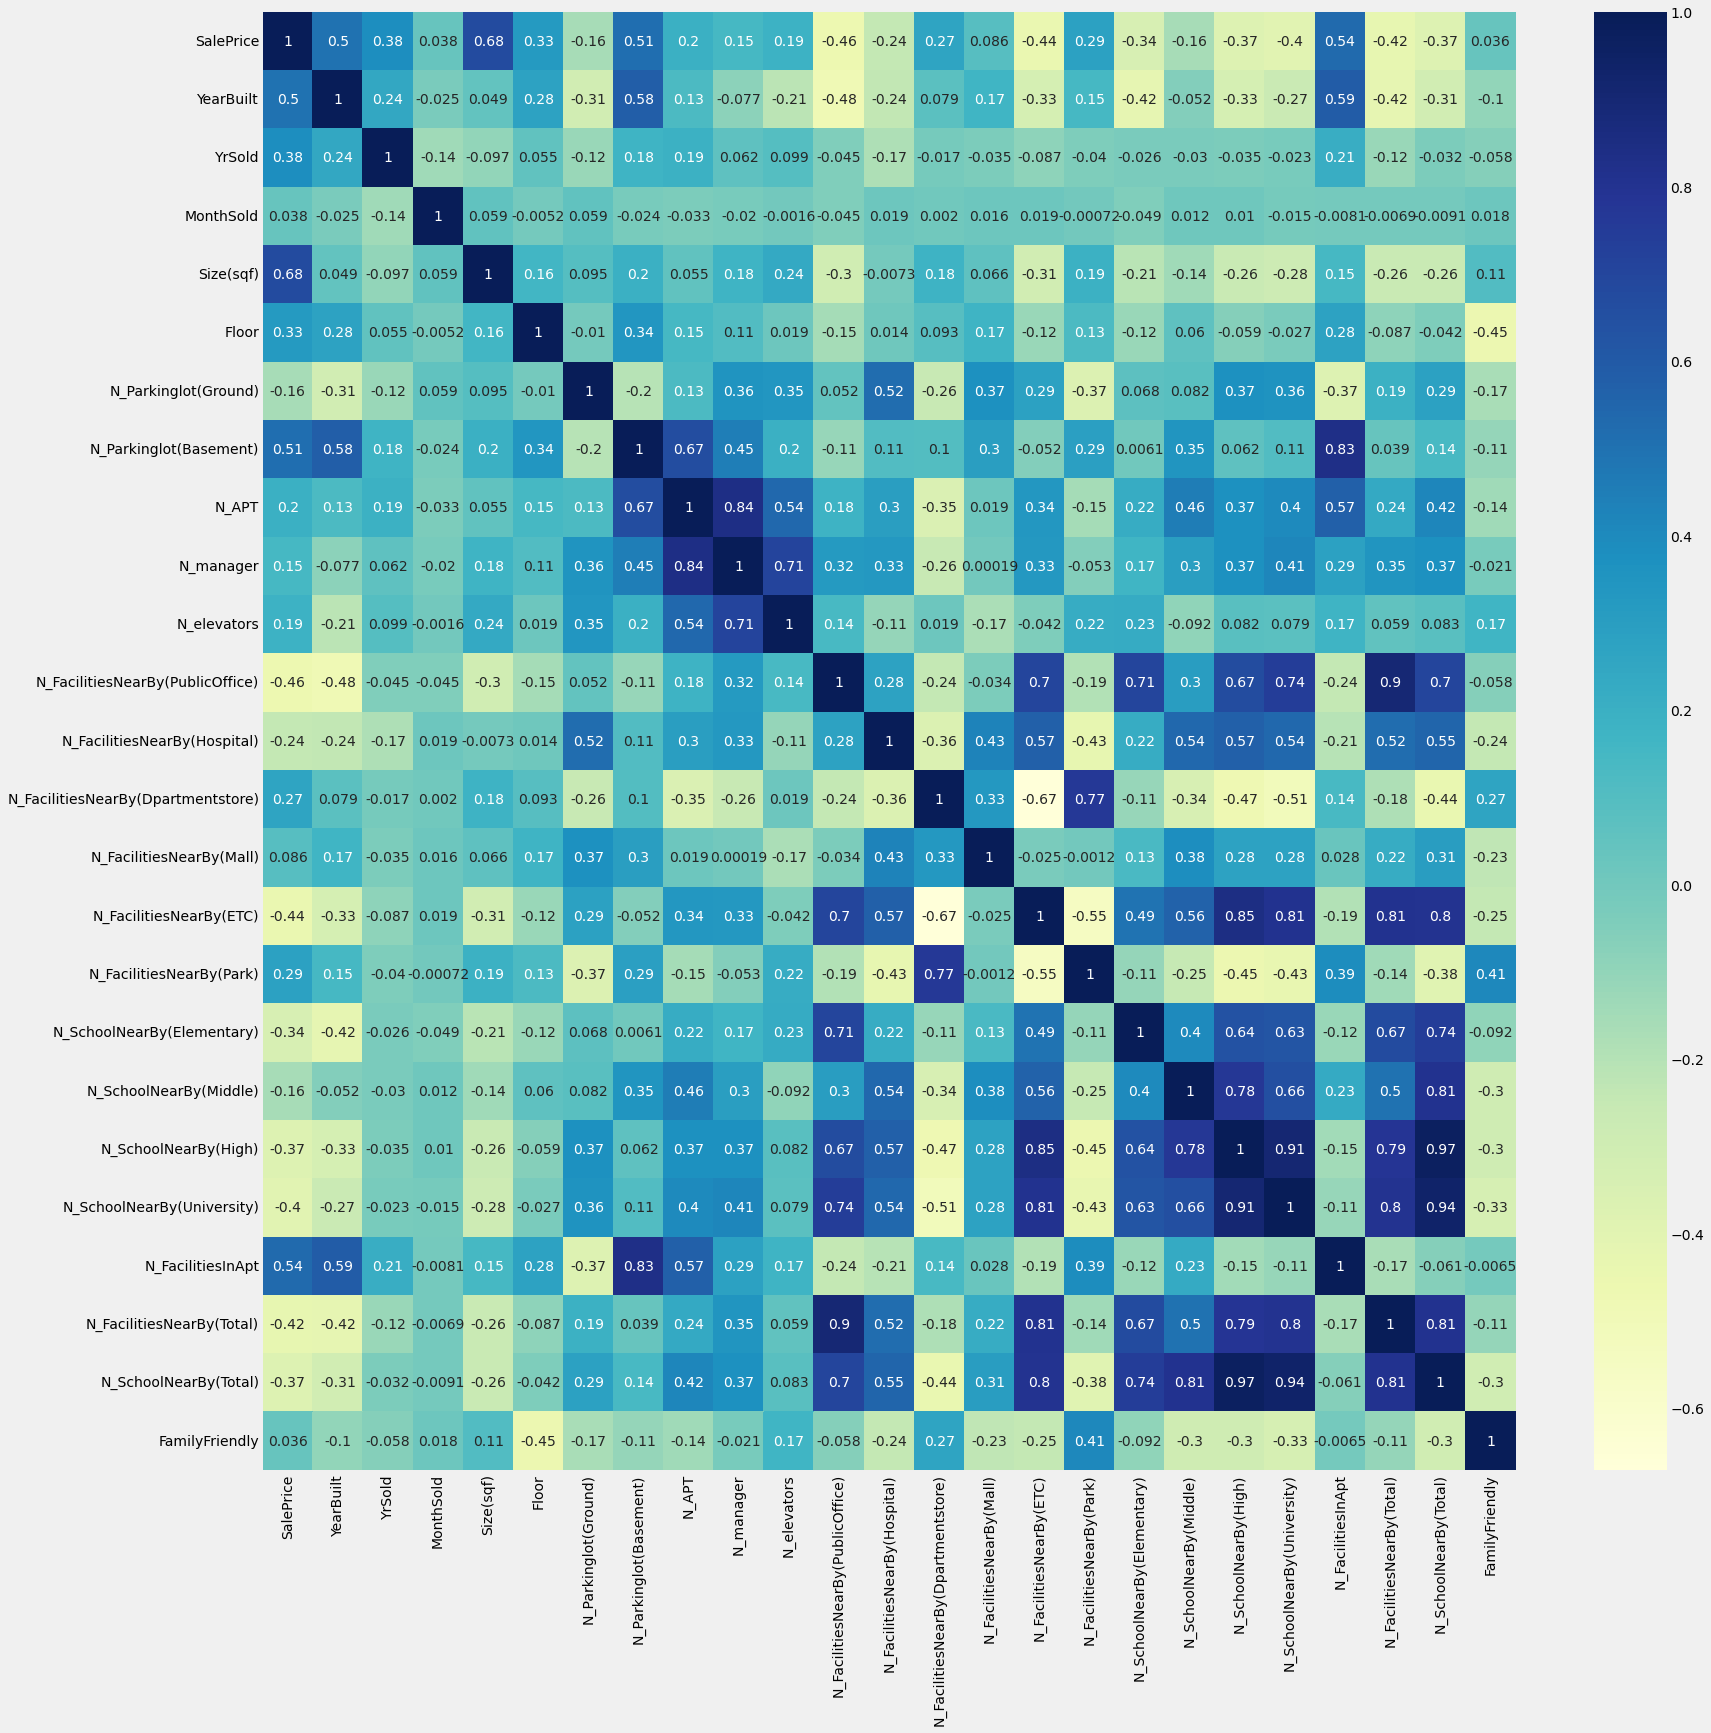

In [ ]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(25,25))

# plotting correlation heatmap
dataplot = sns.heatmap(data_noOutlier.corr(), cmap="YlGnBu", annot=True)

# displaying heatmap
plt.show()

# **B. Problem Guideline Topik 06**

## No.1

### a. Fasilitas apa saja yang paling berpengaruh terhadap harga apartemen?

In [ ]:
# korelasi data menggunakan pearson
corr_mat = data_noOutlier.corr(method='pearson')
corr_mat

corr_mat['SalePrice'].sort_values(ascending=False)

SalePrice                             1.000000
Size(sqf)                             0.676654
N_FacilitiesInApt                     0.536483
N_Parkinglot(Basement)                0.512651
YearBuilt                             0.502960
YrSold                                0.383900
Floor                                 0.326087
N_FacilitiesNearBy(Park)              0.285263
N_FacilitiesNearBy(Dpartmentstore)    0.265402
N_APT                                 0.201395
N_elevators                           0.187668
N_manager                             0.150653
N_FacilitiesNearBy(Mall)              0.086453
MonthSold                             0.038192
FamilyFriendly                        0.036126
N_SchoolNearBy(Middle)               -0.156853
N_Parkinglot(Ground)                 -0.157038
N_FacilitiesNearBy(Hospital)         -0.242544
N_SchoolNearBy(Elementary)           -0.341954
N_SchoolNearBy(Total)                -0.372582
N_SchoolNearBy(High)                 -0.372770
N_SchoolNearB

> <b><i>Jawaban</i></b> : <br>
Fasilitas yang paling berpengaruh adalah Size(sqf) dengan perbandingan lurus terhadap harga apartemen

### b. Apakah terdapat perbedaan harga yang signifikan antara apartemen yang dibangun sebelum dan setelah tahun 2000?

In [ ]:
sebelum_2000 = pd.DataFrame(data_noOutlier[data_noOutlier['YearBuilt'] < 2000])
sebelum_2000[['SalePrice','YearBuilt']]

,SalePrice,YearBuilt
1,51327,1985
2,48672,1985
4,221238,1993
5,35840,1992
6,78318,1992
...,...,...
5871,237168,1978
5873,201769,1978
5879,256637,1986
5880,292035,1986


In [ ]:
setelah_2000 = pd.DataFrame(data_noOutlier[data_noOutlier['YearBuilt'] >= 2000])
setelah_2000[['SalePrice','YearBuilt']]

,SalePrice,YearBuilt
0,141592,2006
12,200884,2007
22,181061,2007
24,198230,2007
25,185840,2007
...,...,...
5885,482300,2007
5886,511504,2007
5887,298230,2006
5888,357522,2007


In [ ]:
mean_sebelum = sebelum_2000['SalePrice'].mean()
print('Rata-rata harga apartemen yang dibangun sebelum tahun 2000: ', mean_sebelum)
mean_setelah = setelah_2000['SalePrice'].mean()
print('Rata-rata harga apartemen yang dibangun setelah tahun 2000: ', mean_setelah)
perbedaan_harga = mean_setelah - mean_sebelum
print('Perbedaan harga yang antara apartemen yang dibangun sebelum dan setelah tahun 2000: ', perbedaan_harga)

Rata-rata harga apartemen yang dibangun sebelum tahun 2000:  140708.16889924285
Rata-rata harga apartemen yang dibangun setelah tahun 2000:  261512.10358780687
Perbedaan harga yang antara apartemen yang dibangun sebelum dan setelah tahun 2000:  120803.93468856401


> <b><i>Jawaban</i></b> : <br>
Berdasarkan hasil penghitungan rata-rata harga apartemen yang dibangun sebelum dan setelah tahun 2000 dengan menggunakan asumsi kurs uang adalah USD, maka perbedaan harga yang ada terhitung signifikan dengan perbedaan sebesar $120804.

### c. Adakah waktu tertentu di mana penjualan apartemen lebih tinggi daripada biasanya?


In [ ]:
def countplot2(column):
  plt.figure(figsize=(10,5))
  plt.yticks(size=10)
  plt.xticks(size=10)
  return sns.countplot(x= column, data=data_noDuplicate)

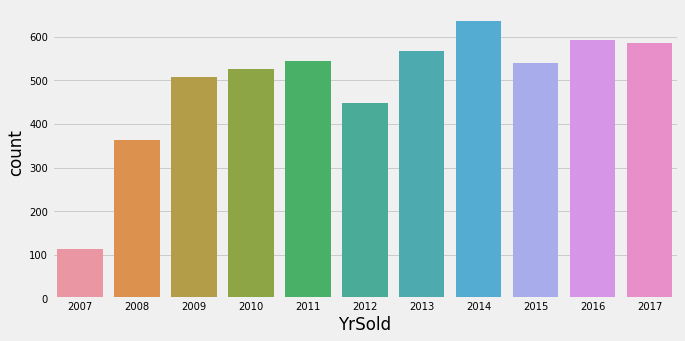

In [ ]:
countplot2('YrSold')

> <b><i>Jawaban</i></b> : <br>
Berdasarkan grafik histogram diatas, penjualan apartemen cenderung tidak ada yang lebih tinggi daripada biasanya namun pada tahun 2014 grafik penjualan sempat berada diatas 600 dengan perbedaan yang tidak terlalu signifikan terhadap tahun lainnya.

### d. Jelaskan tren perubahan harga penjualan apartemen dari tahun ke tahun!


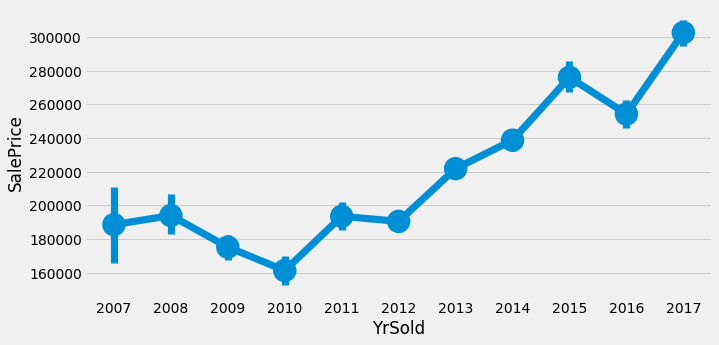

In [ ]:
plt.subplots(figsize=(10,5))
sns.pointplot(x='YrSold', y='SalePrice', data=data_noOutlier)

> <b><i>Jawaban</i></b> : <br>
Tren perubahan harga penjualan apartemen sempat mengalami penurunan dari tahun 2007 hingga tahun 2010 dan sudah mulai mengalami kenaikan hingga tahun 2017 dengan penjualan mencapai $300000 meskipun sempat mengalami penurunan terlebih dahulu pada tahun 2016.

### e. Apakah terdapat perbedaan harga pada apartemen yang memiliki lantai rendah, sedang ataupun tinggi?


In [ ]:
lantai_rendah = pd.DataFrame(data_noOutlier[data_noOutlier['Floor'] <= 4])
lantai_rendah[['SalePrice','Floor']]

,SalePrice,Floor
0,141592,3
4,221238,3
6,78318,2
8,84070,3
10,168141,4
...,...,...
5875,265486,1
5877,283185,2
5880,292035,1
5885,482300,4


In [ ]:
lantai_sedang_fix = pd.DataFrame(data_noOutlier[data_noOutlier['Floor'] > 4])
lantai_sedang = pd.DataFrame(lantai_sedang_fix[data_noOutlier['Floor'] <= 12])
lantai_sedang[['SalePrice','Floor']]

<ipython-input-44-4eaaf2d5c4d6>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lantai_sedang = pd.DataFrame(lantai_sedang_fix[data_noOutlier['Floor'] <= 12])


,SalePrice,Floor
1,51327,8
2,48672,6
5,35840,5
7,61946,10
11,153982,11
...,...,...
5861,246017,12
5865,70796,6
5869,183185,7
5879,256637,8


In [ ]:
lantai_tinggi = pd.DataFrame(data_noOutlier[data_noOutlier['Floor'] > 12])
lantai_tinggi[['SalePrice','Floor']]

,SalePrice,Floor
9,83185,13
12,200884,18
15,185840,24
21,92035,20
22,181061,18
...,...,...
5884,307079,22
5886,511504,19
5887,298230,13
5888,357522,20


In [ ]:
mean_rendah = lantai_rendah['SalePrice'].mean()
mean_sedang = lantai_sedang['SalePrice'].mean()
mean_tinggi = lantai_tinggi['SalePrice'].mean()

In [ ]:
data_lantai = [['rendah', mean_rendah], ['sedang', mean_sedang], ['tinggi', mean_tinggi]]
harga_lantai = pd.DataFrame(data_lantai, columns=['Lantai Apartement', 'Rata-rata Harga'])
harga_lantai

,Lantai Apartement,Rata-rata Harga
0,rendah,195079.085197
1,sedang,206481.405229
2,tinggi,249918.422108


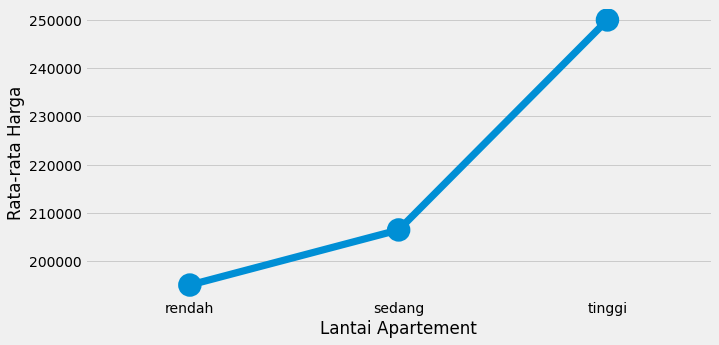

In [ ]:
plt.subplots(figsize=(10,5))
sns.pointplot(x='Lantai Apartement', y='Rata-rata Harga', data=harga_lantai)

> <b><i>Jawaban</i></b> : <br>
Berdasarkan grafik perbedaan harga terhadap lantai apartement, dapat disimpulkan bahwa terdapat perbedaan harga apartement menyesuaikan banyak lantai yang ada. Hal ini dilihat melalui apartement dengan lantai rendah (dibawah 5 lantai) memiliki rata-rata harga yang rendah juga dan hal yang sama berlaku untuk apartement dengan lantai sedang (5 hingga 12 lantai) maupun tinggi (diatas 12 lantai).

### f. Apakah jarak dengan subway dan bus stop dari apartemen (aksesibilitas warga ke transportasi umum) akan mempengaruhi harga apartemen?


In [ ]:
# encode target terlebih dahulu menjadi numerik menggunakan label encoder
from sklearn.preprocessing import LabelEncoder

lab = LabelEncoder()
data_encoded = data_noOutlier.copy()

data_encoded["TimeToBusStop"] = lab.fit_transform(data_encoded["TimeToBusStop"])
data_encoded["TimeToSubway"] = lab.fit_transform(data_encoded["TimeToSubway"])
data_encoded[['TimeToBusStop','TimeToSubway']]

,TimeToBusStop,TimeToSubway
0,2,1
1,0,3
2,0,3
4,0,2
5,2,1
...,...,...
5886,0,0
5887,2,0
5888,0,0
5889,0,0


In [ ]:
# cek banyak value unique pada atribut TimeToBusStop
data_encoded['TimeToBusStop'].unique()

array([2, 0, 1])

In [ ]:
data_noOutlier['TimeToBusStop'].value_counts()

0~5min         4062
5min~10min     1308
10min~15min      54
Name: TimeToBusStop, dtype: int64

In [ ]:
data_encoded['TimeToBusStop'].value_counts()

0    4062
2    1308
1      54
Name: TimeToBusStop, dtype: int64

In [ ]:
bus_dekat = pd.DataFrame(data_encoded[data_encoded['TimeToBusStop'] == 0])
bus_sedang = pd.DataFrame(data_encoded[data_encoded['TimeToBusStop'] == 2])
bus_jauh = pd.DataFrame(data_encoded[data_encoded['TimeToBusStop'] == 1])

In [ ]:
mean_bus_dekat = bus_dekat['SalePrice'].mean()
mean_bus_sedang = bus_sedang['SalePrice'].mean()
mean_bus_jauh = bus_jauh['SalePrice'].mean()

In [ ]:
data_bus = [['dekat', mean_bus_dekat], ['sedang', mean_bus_sedang], ['jauh', mean_bus_jauh]]
harga_bus = pd.DataFrame(data_bus, columns=['Jarak menuju pemberhentian bus', 'Rata-rata Harga'])
harga_bus

,Jarak menuju pemberhentian bus,Rata-rata Harga
0,dekat,239089.596258
1,sedang,181001.255352
2,jauh,57216.888889


In [ ]:
# cek banyak value unique pada atribut TimeToSubway
data_encoded['TimeToSubway'].unique()

array([1, 3, 2, 0, 4])

In [ ]:
data_noOutlier['TimeToSubway'].value_counts()

0-5min                2471
5min~10min            1016
15min~20min            931
10min~15min            787
no_bus_stop_nearby     219
Name: TimeToSubway, dtype: int64

In [ ]:
data_encoded['TimeToSubway'].value_counts()

0    2471
3    1016
2     931
1     787
4     219
Name: TimeToSubway, dtype: int64

In [ ]:
subway_dekatbgt = pd.DataFrame(data_encoded[data_encoded['TimeToSubway'] == 0])
subway_dekat = pd.DataFrame(data_encoded[data_encoded['TimeToSubway'] == 3])
subway_sedang = pd.DataFrame(data_encoded[data_encoded['TimeToSubway'] == 1])
subway_jauh = pd.DataFrame(data_encoded[data_encoded['TimeToSubway'] == 2])
subway_tidakada = pd.DataFrame(data_encoded[data_encoded['TimeToSubway'] == 4])

In [ ]:
mean_sub_dekatbgt = subway_dekatbgt['SalePrice'].mean()
mean_sub_dekat = subway_dekat['SalePrice'].mean()
mean_sub_sedang = subway_sedang['SalePrice'].mean()
mean_sub_jauh = subway_jauh['SalePrice'].mean()
mean_sub_tidakada = subway_tidakada['SalePrice'].mean()

In [ ]:
data_sub = [['sangat dekat', mean_sub_dekatbgt], ['dekat', mean_sub_dekat], ['sedang', mean_sub_sedang], ['jauh', mean_sub_jauh], ['tidak ada', mean_sub_tidakada]]
harga_sub = pd.DataFrame(data_sub, columns=['Jarak menuju pemberhentian subway', 'Rata-rata Harga'])
harga_sub

,Jarak menuju pemberhentian subway,Rata-rata Harga
0,sangat dekat,291854.331040
1,dekat,177632.759843
2,sedang,157555.491741
3,jauh,148718.307197
4,tidak ada,214253.159817


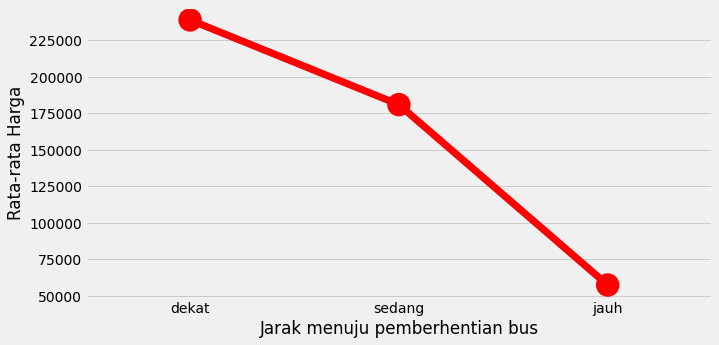

In [ ]:
plt.subplots(figsize=(10,5))
sns.pointplot(x='Jarak menuju pemberhentian bus', y='Rata-rata Harga', data=harga_bus, color='red')

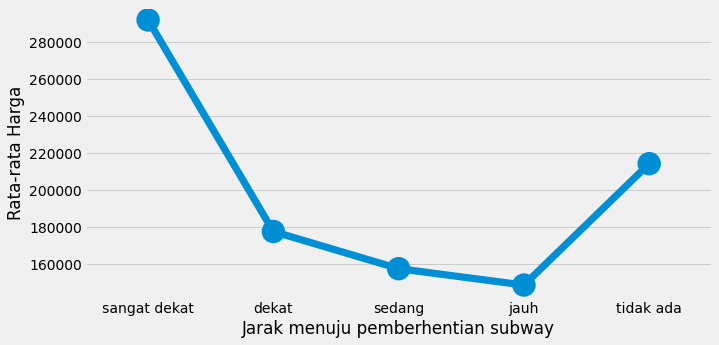

In [ ]:
plt.subplots(figsize=(10,5))
sns.pointplot(x='Jarak menuju pemberhentian subway', y='Rata-rata Harga', data=harga_sub)

> <b><i>Jawaban</i></b> : <br>
Berdasarkan plot diatas, jarak menuju pemberhentian bus dan jarak menuju pemberhentian subway (aksesibilitas warga ke transportasi umum) akan memengaruhi harga apartement. Hal ini, dapat dilihat melalui rata-rata harga apartement pada lokasi yang dekat dengan akses transportasi memiliki harga yang cenderung tinggi, sedangkan pada lokasi yang jauh memiliki harga yang relatif lebih rendah. Namun, dikhususkan pada kasus lokasi apartement yang tidak memiliki stasiun subway terdekat memiliki harga yang lebih tinggi dari apartement dengan lokasi dekat subway namun lebih rendah dari lokasi yang sangar dekat dengan subway.

## No. 2


In [ ]:
# melakukan fit_transform pada atribut terpilih
data_noOutlier["HallwayType"] = lab.fit_transform(data_noOutlier["HallwayType"])
data_noOutlier["HeatingType"] = lab.fit_transform(data_noOutlier["HeatingType"])
data_noOutlier["AptManageType"] = lab.fit_transform(data_noOutlier["AptManageType"])
data_noOutlier["TimeToBusStop"] = lab.fit_transform(data_noOutlier["TimeToBusStop"])
data_noOutlier["TimeToSubway"] = lab.fit_transform(data_noOutlier["TimeToSubway"])

In [ ]:
X = data_noOutlier.drop(['FamilyFriendly', 'SubwayStation'], axis=1) # menghapus SubwayStation karena tidak relevan
y = data_noOutlier['FamilyFriendly']

selector = SelectKBest(k=5)
X = selector.fit_transform(X, y)

In [ ]:
selector.get_feature_names_out(input_features=selector.feature_names_in_)

array(['Floor', 'HeatingType', 'N_FacilitiesNearBy(Park)',
       'N_SchoolNearBy(University)', 'N_SchoolNearBy(Total)'],
      dtype=object)

In [ ]:
#KFold
cv = KFold(random_state=123, shuffle=True)

### a. Lakukan klasifikasi yang menentukan apakah sebuah apartemen family friendly!

In [ ]:
data_encoded["HallwayType"] = lab.fit_transform(data_encoded["HallwayType"])
data_encoded["HeatingType"] = lab.fit_transform(data_encoded["HeatingType"])
data_encoded["AptManageType"] = lab.fit_transform(data_encoded["AptManageType"])
data_encoded["SubwayStation"] = lab.fit_transform(data_encoded["SubwayStation"])

data_encoded

,SalePrice,YearBuilt,YrSold,MonthSold,Size(sqf),Floor,HallwayType,HeatingType,AptManageType,N_Parkinglot(Ground),...,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(Park),N_SchoolNearBy(Elementary),N_SchoolNearBy(Middle),N_SchoolNearBy(High),N_SchoolNearBy(University),N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total),FamilyFriendly
0,141592,2006,2007,8,814,3,2,1,0,111.0,...,1,0,3,2,2,2,5,6,9,0.0
1,51327,1985,2007,8,587,8,0,1,1,80.0,...,2,1,2,1,1,0,3,12,4,1.0
2,48672,1985,2007,8,587,6,0,1,1,80.0,...,2,1,2,1,1,0,3,12,4,1.0
4,221238,1993,2007,8,1761,3,1,1,0,523.0,...,5,0,4,3,5,5,4,14,17,0.0
5,35840,1992,2007,8,355,5,0,1,0,200.0,...,5,1,4,3,5,5,3,16,17,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5886,511504,2007,2017,8,1643,19,2,1,0,0.0,...,0,2,3,3,2,2,10,9,10,0.0
5887,298230,2006,2017,8,903,13,2,1,0,123.0,...,2,0,4,3,3,1,4,8,11,0.0
5888,357522,2007,2017,8,868,20,2,1,0,0.0,...,0,2,3,3,2,2,10,9,10,0.0
5889,312389,1978,2017,8,1327,1,0,1,1,87.0,...,0,0,3,3,3,2,3,7,11,0.0


In [ ]:
x = data_encoded[['Floor', 'HeatingType', 'N_FacilitiesNearBy(Park)',
       'N_SchoolNearBy(University)', 'N_SchoolNearBy(Total)']]
x = x.to_numpy()
x

array([[ 3,  1,  0,  2,  9],
       [ 8,  1,  1,  0,  4],
       [ 6,  1,  1,  0,  4],
       ...,
       [20,  1,  2,  2, 10],
       [ 1,  1,  0,  2, 11],
       [13,  1,  2,  2, 10]])

In [ ]:
y = data_encoded["FamilyFriendly"]
y = y.to_numpy()
y

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
counter = Counter(y)
print(counter)

Counter({0.0: 4200, 1.0: 1224})


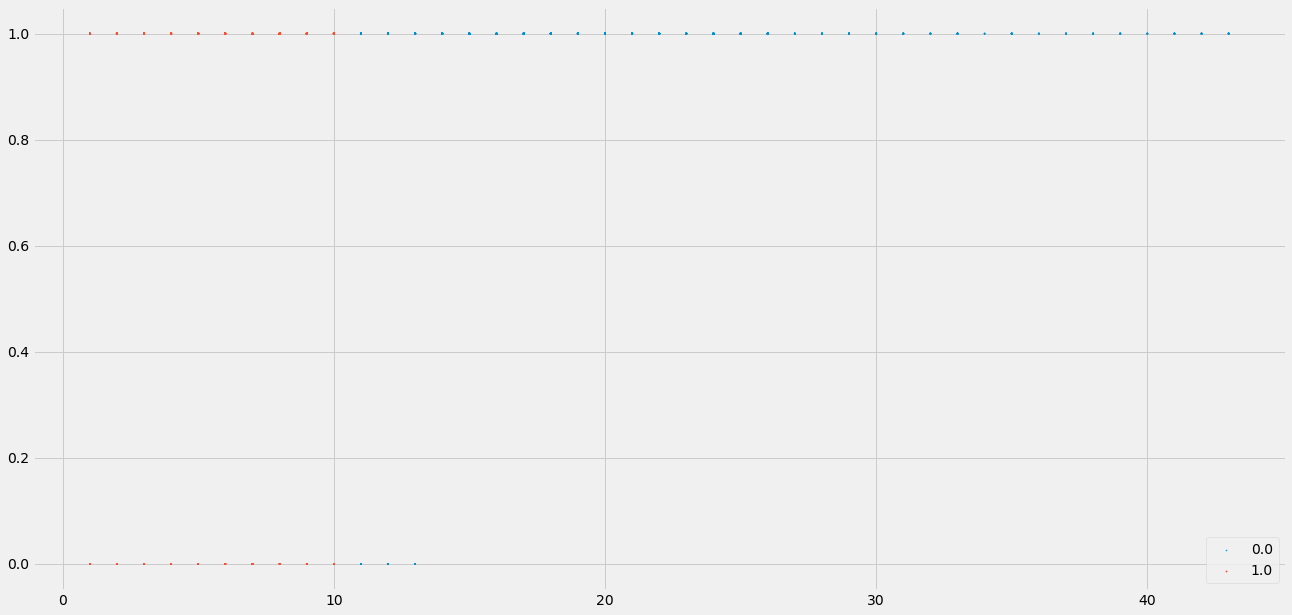

In [ ]:
plt.figure(figsize=(20, 10))
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    plt.scatter(x[row_ix, 0], x[row_ix, 1], x[row_ix, 2], label=str(label))
plt.legend()
plt.show()

####Gaussian

In [ ]:
from sklearn.naive_bayes import GaussianNB
# Mengaktifkan/memanggil/membuat fungsi klasifikasi Naive Bayes
modelnb = GaussianNB()

In [ ]:
scores_nb = cross_val_score(modelnb, x, y, scoring='f1', cv=cv)
np.mean(scores_nb)

0.6974180769604199

####KNN

In [ ]:
KNN = KNeighborsClassifier(n_neighbors=2) # kita akan menggunakan nilai 2 untuk k terlebih dahulu

In [ ]:
scores_knn = cross_val_score(KNN, x, y, scoring='f1', cv=cv)
np.mean(scores_knn)

0.9330264473002245

####Decision Tree

In [ ]:
dt = DecisionTreeClassifier()

In [ ]:
scores_dt = cross_val_score(dt, x, y, scoring='f1', cv=cv)
np.mean(scores_dt)

0.941257763099738

####Random Forest

In [ ]:
rf = RandomForestClassifier()

In [ ]:
scores_rf = cross_val_score(rf, x, y, scoring='f1', cv=cv)
np.mean(scores_rf)

0.9414874745429053

In [ ]:
param_grid = {'criterion': ['gini', 'entropy'],
               'n_estimators': [10, 50, 100, 200],
               'min_samples_split': [5, 10, 20, 50],
               'max_depth' : [5, 10, 20, 50]}

rf2 = RandomForestClassifier()

clf = GridSearchCV(estimator=rf2, param_grid=param_grid, cv=cv)

clf.fit(x, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=123, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 50],
                         'min_samples_split': [5, 10, 20, 50],
                         'n_estimators': [10, 50, 100, 200]})

In [ ]:
clf.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_split': 5,
 'n_estimators': 50}

In [ ]:
rf2 = RandomForestClassifier(**clf.best_params_)

In [ ]:
scores_rf2 = cross_val_score(rf2, x, y, scoring='f1', cv=cv)
np.mean(scores_rf2)

0.9481359459077924

####Oversampling

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42, stratify=y)

In [ ]:
train_0, train_1 = len(y_train[y_train==0]), len(y_train[y_train==1])
test_0,test_1 = len(y_test[y_test==0]), len(y_test[y_test==1])
print('>Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))

>Train: 0=3360, 1=979, Test: 0=840, 1=245


In [ ]:
oversample = SMOTE()
X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train)

In [ ]:
counter = Counter(y_train_smote)
print(counter)

Counter({0.0: 3360, 1.0: 3360})


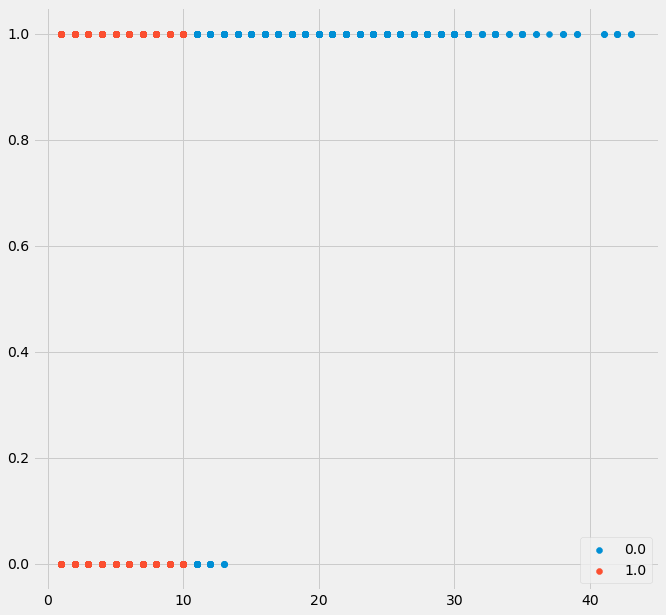

In [ ]:
plt.figure(figsize=(10, 10))
for label, _ in counter.items():
    row_ix = where(y_train_smote == label)[0]
    plt.scatter(X_train_smote[row_ix, 0], X_train_smote[row_ix, 1], label=str(label))
plt.legend()
plt.show()

In [ ]:
cv2 = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

####Random Forest Setelah Oversampling

In [ ]:
scores_rf2_smote = cross_val_score(rf2, X_train_smote, y_train_smote, scoring='roc_auc', cv=cv2)
np.mean(scores_rf2_smote)

0.9954059488378686

In [ ]:
rf2.fit(X_train_smote, y_train_smote)

RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_split=5,
                       n_estimators=50)

In [ ]:
pred_rf2_smote = rf2.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print("Akurasi Model: ", accuracy_score(y_test, pred_rf2_smote))
print("Presisi Model: ", precision_score(y_test, pred_rf2_smote))
print("Recall Model: ", recall_score(y_test, pred_rf2_smote, average='weighted'))
print("F1-score Model: ", f1_score(y_test, pred_rf2_smote, average='weighted'))
print("ROC AUC Score Model: ", roc_auc_score(y_test, pred_rf2_smote, average='weighted'))

Akurasi Model:  0.9741935483870968
Presisi Model:  0.8974358974358975
Recall Model:  0.9741935483870968
F1-score Model:  0.9746723213098281
ROC AUC Score Model:  0.9833333333333334


> <b><i>Jawaban</i></b> : <br>
Berdasarkan hasil penghitungan klasifikasi untuk menentukan apakah sebuah apartemen family friendly, dapat disimpulkan bahwa fitur-fitur yang ada pada sebuah apartemen dengan hasil seleksi 5 fitur berupa Floor, HeatingType, N_FacilitiesNearBy(Park), N_SchoolNearBy(University), dan N_SchoolNearBy(Total) mampu menentukan kondisi family friendly dari suatu apartemen dengan scoring hasil tertinggi diperoleh menggunakan Random Forest Classifier dan setelah dilakukan tahapan oversampling pada data.

###b. Buat model yang memprediksi harga per square ft berdasarkan fitur-fitur yang dimiliki!

In [ ]:
data_new = pd.DataFrame(data_encoded)
price_per_ft = pd.Series(data_new['SalePrice'] / data_new['Size(sqf)'])
data_new['PricePerFt'] = price_per_ft
data_new = data_new.drop(['SalePrice','Size(sqf)'], axis=1)
data_new.head(5)

,YearBuilt,YrSold,MonthSold,Floor,HallwayType,HeatingType,AptManageType,N_Parkinglot(Ground),N_Parkinglot(Basement),TimeToBusStop,...,N_FacilitiesNearBy(Park),N_SchoolNearBy(Elementary),N_SchoolNearBy(Middle),N_SchoolNearBy(High),N_SchoolNearBy(University),N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total),FamilyFriendly,PricePerFt
0,2006,2007,8,3,2,1,0,111.0,184,2,...,0,3,2,2,2,5,6,9,0.0,173.945946
1,1985,2007,8,8,0,1,1,80.0,76,0,...,1,2,1,1,0,3,12,4,1.0,87.439523
2,1985,2007,8,6,0,1,1,80.0,76,0,...,1,2,1,1,0,3,12,4,1.0,82.916525
4,1993,2007,8,3,1,1,0,523.0,536,0,...,0,4,3,5,5,4,14,17,0.0,125.632027
5,1992,2007,8,5,0,1,0,200.0,0,2,...,1,4,3,5,5,3,16,17,0.0,100.957746


In [ ]:
# korelasi data menggunakan pearson
corr_mat = data_new.corr(method='pearson')
corr_mat

corr_mat['PricePerFt'].sort_values(ascending=False)

PricePerFt                            1.000000
YrSold                                0.691931
YearBuilt                             0.671869
N_FacilitiesInApt                     0.518919
N_Parkinglot(Basement)                0.477051
HallwayType                           0.379997
N_APT                                 0.264568
Floor                                 0.254439
HeatingType                           0.181981
N_FacilitiesNearBy(Park)              0.093602
N_FacilitiesNearBy(Dpartmentstore)    0.081133
N_manager                             0.071880
N_elevators                           0.036842
SubwayStation                         0.016237
N_FacilitiesNearBy(Mall)             -0.009815
MonthSold                            -0.010727
TimeToBusStop                        -0.047282
N_SchoolNearBy(Middle)               -0.085631
FamilyFriendly                       -0.091700
AptManageType                        -0.117078
TimeToSubway                         -0.180755
N_SchoolNearB

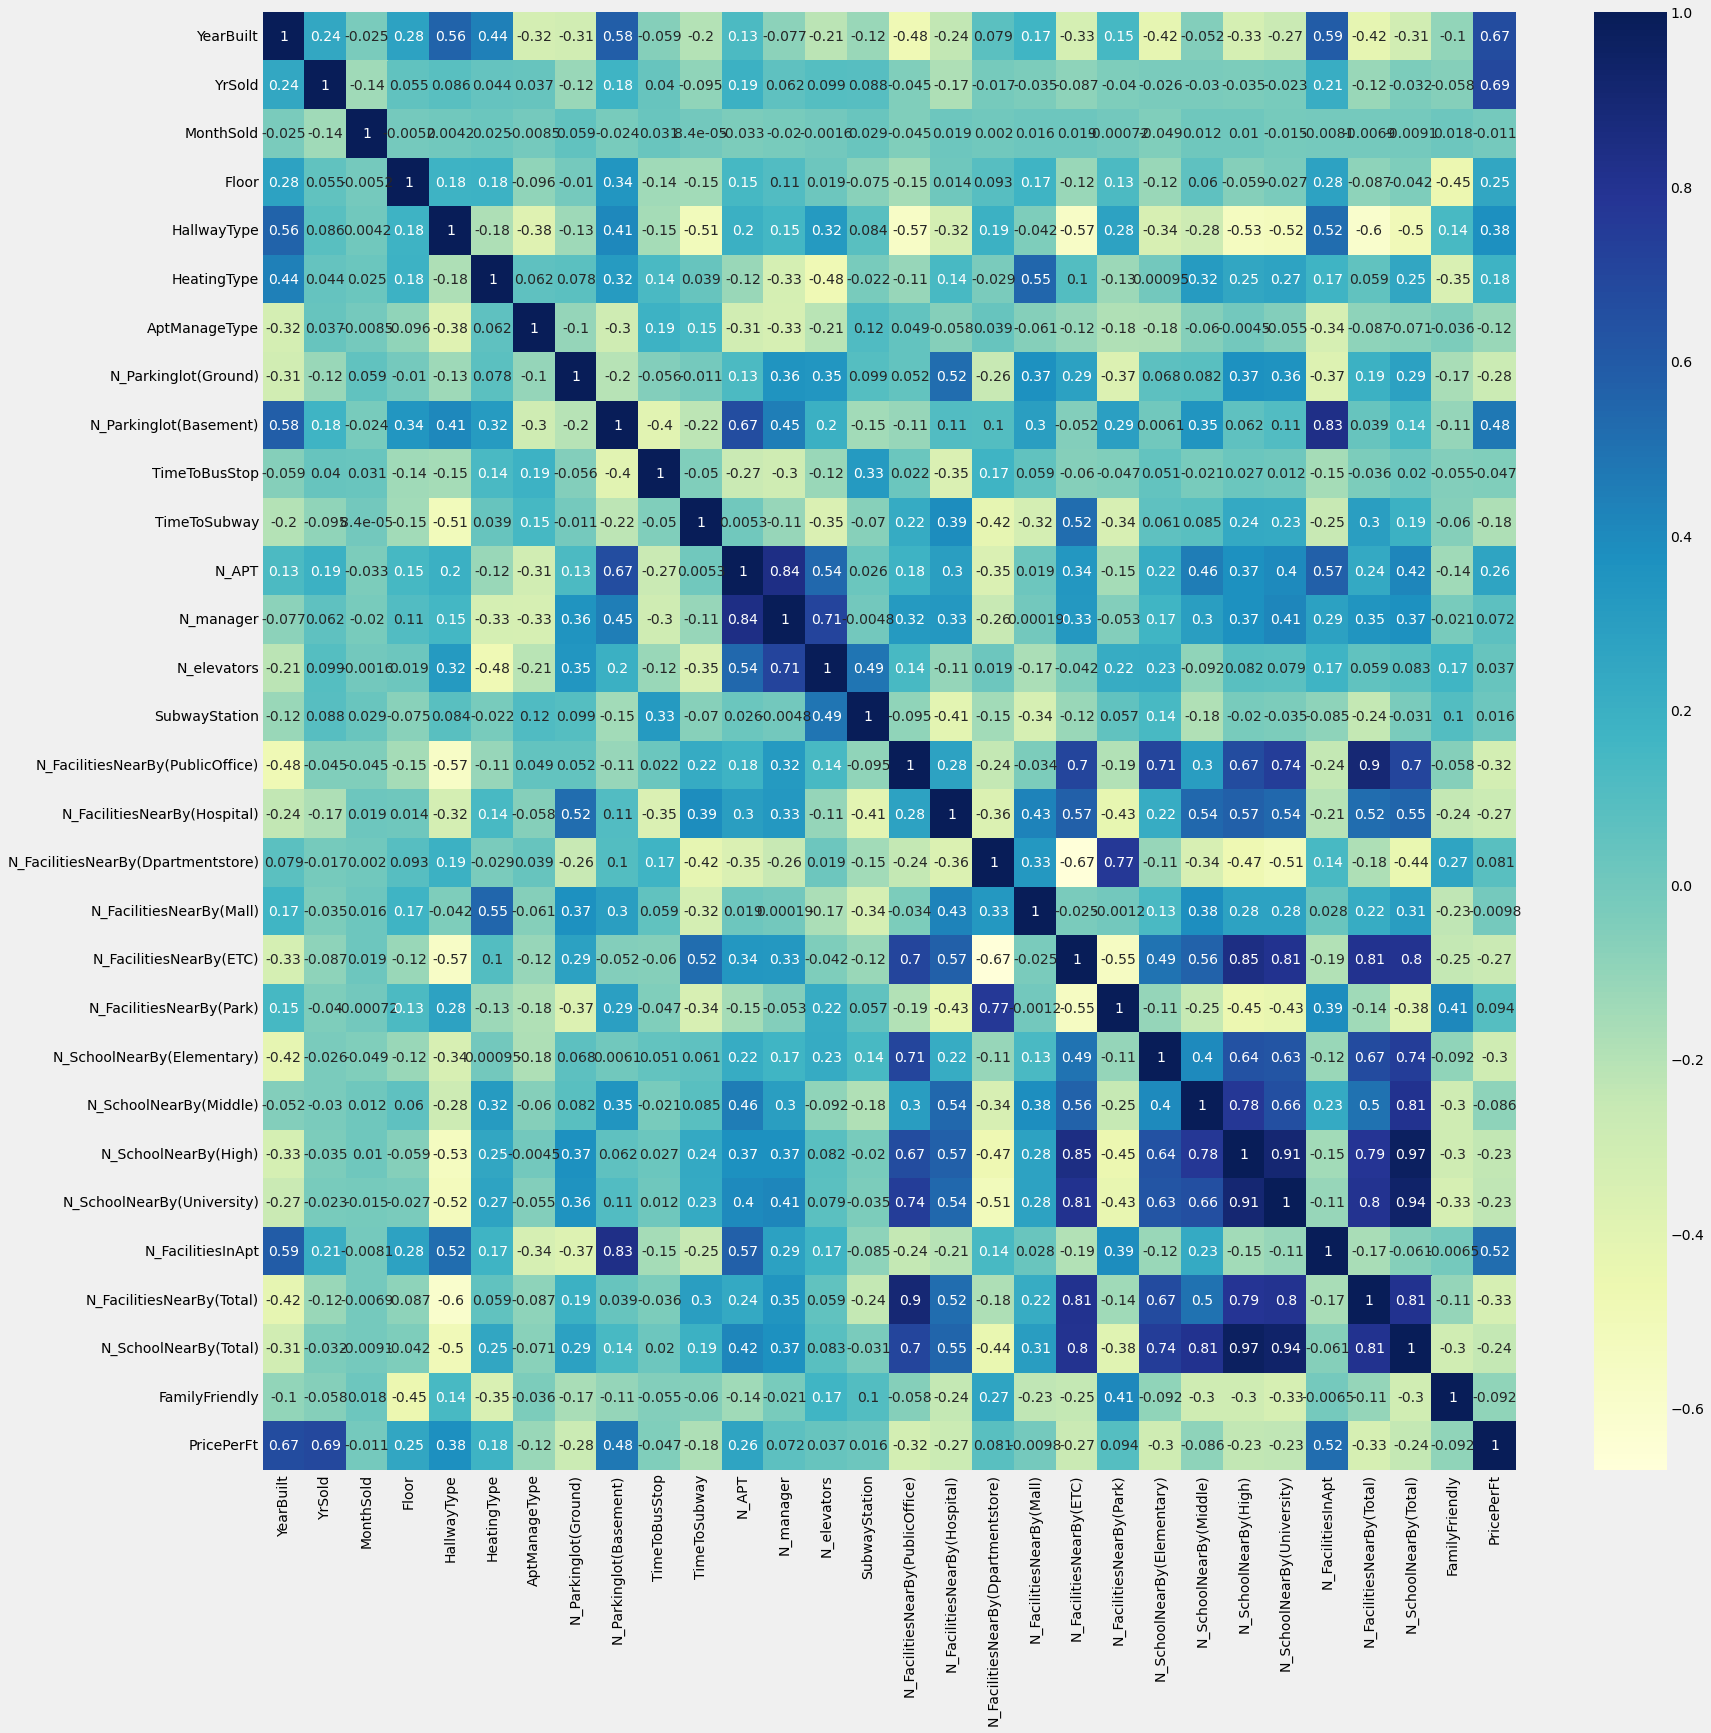

In [ ]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(25,25))

# plotting correlation heatmap
dataplot = sns.heatmap(data_new.corr(), cmap="YlGnBu", annot=True)

# displaying heatmap
plt.show()

In [ ]:
X = data_new.drop(['PricePerFt', 'SubwayStation'], axis=1) #Menghapus SubwayStation karena tidak relevan
X_fix = X.values
y = data_new['PricePerFt']
y_fix = y.values
selector = SelectKBest(k=4)
X = selector.fit_transform(X, y)

In [ ]:
selector.get_feature_names_out(input_features=selector.feature_names_in_)

array(['YearBuilt', 'HallwayType', 'N_Parkinglot(Basement)',
       'N_FacilitiesInApt'], dtype=object)

In [ ]:
X = data_new[['YearBuilt', 'HallwayType', 'N_Parkinglot(Basement)', 'N_FacilitiesInApt','PricePerFt']]
X.head()

,YearBuilt,HallwayType,N_Parkinglot(Basement),N_FacilitiesInApt,PricePerFt
0,2006,2,184,5,173.945946
1,1985,0,76,3,87.439523
2,1985,0,76,3,82.916525
4,1993,1,536,4,125.632027
5,1992,0,0,3,100.957746


In [ ]:
from sklearn.model_selection import train_test_split

# Membagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X_fix, y_fix, test_size=0.4, random_state=101)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_new[X.columns] = scaler.fit_transform(X)
X = data_new.drop(['PricePerFt'],axis=1)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

####Linear Regression

In [ ]:
# Membangun model
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Melakukan prediksi pada data testing
y_linreg_predict = linreg.predict(X_test)

Text(0, 0.5, 'Y Predicted')

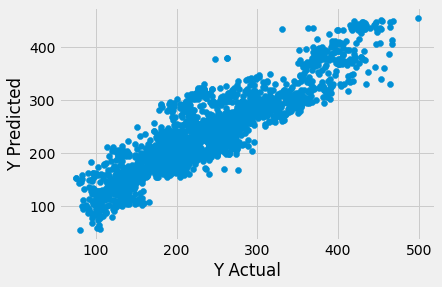

In [ ]:
# Visualisasi hasil prediksi
import matplotlib.pyplot as plt

plt.figure
plt.scatter(y_test, y_linreg_predict)
plt.xlabel('Y Actual')
plt.ylabel('Y Predicted')

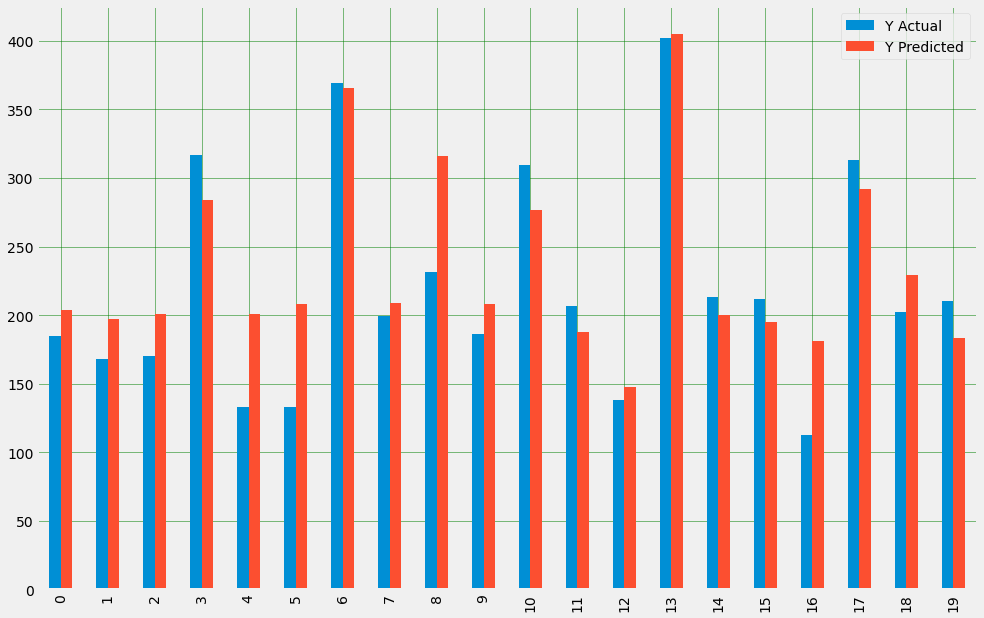

In [ ]:
data = {'Y Actual': y_test, 'Y Predicted': y_linreg_predict}
data_test = pd.DataFrame(data)
df_temp = data_test.head(20)
df_temp.plot(kind='bar',figsize=(15,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.show()

In [ ]:
print("Koefisien persamaan linear: \n", linreg.coef_)
print("Intersep persamaan linear: \n", linreg.intercept_)

Koefisien persamaan linear: 
 [ 1.79764142e+02  1.43281528e+02  2.16897444e+01  3.21122685e+01
 -9.12218659e+01 -7.31716058e+01 -1.66432954e+01 -6.71562784e+01
  6.62780252e+01  1.53107851e+01 -5.97952400e+00 -1.43192804e+02
  5.32448722e+01  7.20221810e+01 -1.60865268e+11 -4.59615052e+10
 -4.59615053e+10 -4.59615053e+10 -1.14903763e+11 -4.59615053e+10
 -1.57560094e+12 -1.05040063e+12 -1.31300078e+12 -1.31300078e+12
  1.18963350e+02  3.67692042e+11  4.46420266e+12  1.02301631e+00]
Intersep persamaan linear: 
 147.35356558459776


In [ ]:
import math
from sklearn import metrics

# Nilai MSE, MAE, RMSE, dan R2 Square
print("MSE:", metrics.mean_squared_error(y_test, y_linreg_predict))
print("MAE:", metrics.mean_absolute_error(y_test, y_linreg_predict))
print("RMSE: ", math.sqrt(metrics.mean_squared_error(y_test, y_linreg_predict)))
print("R-squared:", metrics.r2_score(y_test, y_linreg_predict))

MSE: 1290.8560757017776
MAE: 27.435182605576962
RMSE:  35.92848557484406
R-squared: 0.8087936223227323


In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=1)

cnt = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1

Fold:1, Train set: 4339, Test set:1085
Fold:2, Train set: 4339, Test set:1085
Fold:3, Train set: 4339, Test set:1085
Fold:4, Train set: 4339, Test set:1085
Fold:5, Train set: 4340, Test set:1084


In [ ]:
score = cross_val_score(linreg, X, y, cv= kf, scoring="r2")
print(f'R2 Scores for each fold: {score}')
print(np.mean(score))

R2 Scores for each fold: [0.82606737 0.82879164 0.8240933  0.82661874 0.83180079]
0.8274743669027227


####Ridge Regression

In [ ]:
ridge = Ridge()

In [ ]:
alpha = [1, 4, 6, 12, 20, 25]

In [ ]:
list_r_squared_train = []
list_r_squared_test = []

# Membangun dan mengevaluasi model untuk setiap nilai alpha
for a in alpha:

  # Membangun model
  ridge.set_params(**{'alpha': a})
  ridge.fit(X_train, y_train)

  # Mengevaluasi model pada training dan testing set menggunakan R-squared
  r_squared_train = ridge.score(X_train, y_train)
  r_squared_test = ridge.score(X_test, y_test)

  # Menambahkan nilai R-squared ke list
  list_r_squared_train.append(r_squared_train)
  list_r_squared_test.append(r_squared_test)

In [ ]:
print("R-squared training:", list_r_squared_train)
print("R-squared testing:", list_r_squared_test)

R-squared training: [0.8318803732927132, 0.8295000547950271, 0.8276841931950394, 0.8224246650838464, 0.8161592851470993, 0.8125580563151491]
R-squared testing: [0.8072364356095163, 0.8041885486672623, 0.802066705880131, 0.796171048748541, 0.7894751385559708, 0.7857417359193603]


> Melalui hasil diatas dapat dilihat bahwa alpha tertinggi pada model regresi lasso adalah 1.

In [ ]:
ridge = Ridge(alpha=1)
ridge.fit(X_train, y_train)

Ridge(alpha=1)

In [ ]:
y_ridge_predict = ridge.predict(X_test)

Text(0, 0.5, 'Y Predicted')

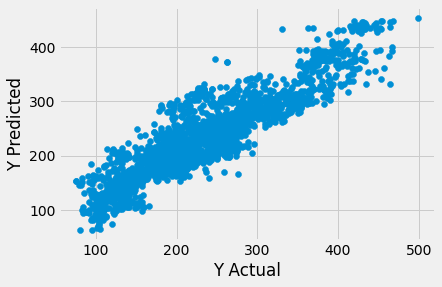

In [ ]:
plt.figure
plt.scatter(y_test, y_ridge_predict)
plt.xlabel('Y Actual')
plt.ylabel('Y Predicted')

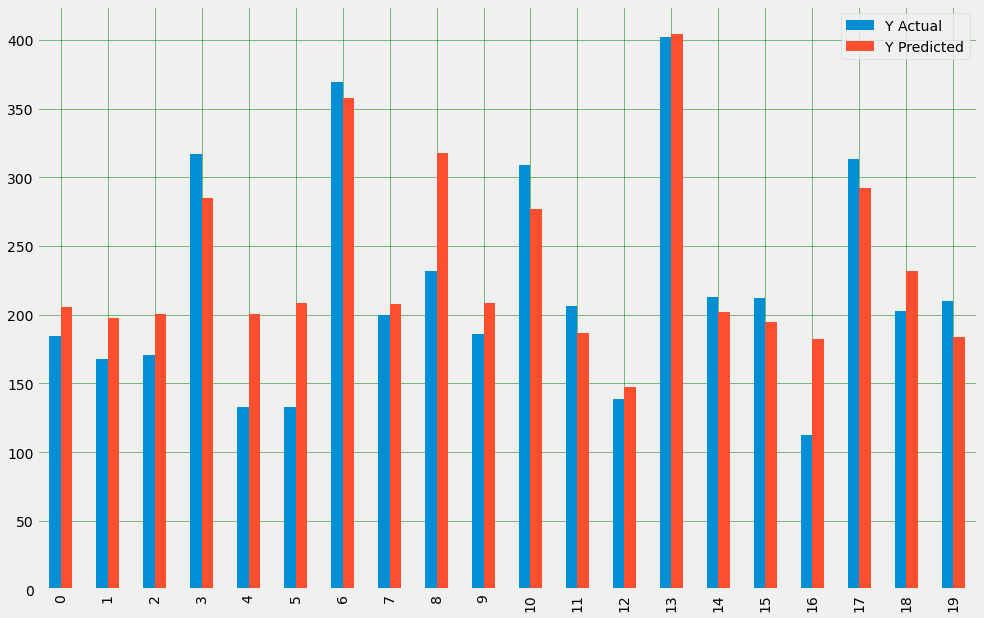

In [ ]:
data = {'Y Actual': y_test, 'Y Predicted': y_ridge_predict}
data_test = pd.DataFrame(data)
df_temp = data_test.head(20)
df_temp.plot(kind='bar',figsize=(15,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.show()

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=1)

cnt = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1

Fold:1, Train set: 4339, Test set:1085
Fold:2, Train set: 4339, Test set:1085
Fold:3, Train set: 4339, Test set:1085
Fold:4, Train set: 4339, Test set:1085
Fold:5, Train set: 4340, Test set:1084


In [ ]:
from sklearn.linear_model import RidgeCV

ridge = RidgeCV(alphas=[1], cv=kf, scoring="r2").fit(X, y)
ridge.score(X, y)

0.8286409609176298

In [ ]:
score2 = cross_val_score(ridge, X, y, cv= kf, scoring="r2")
print(f'R2 Scores for each fold: {score2}')
print(np.mean(score2))

R2 Scores for each fold: [0.82518407 0.82969829 0.82414341 0.82522611 0.83220656]
0.8272916888213532


####Lasso Regression

In [ ]:
lasso = Lasso()

In [ ]:
alpha = [1, 4, 6, 12, 20, 25]

In [ ]:
list_r_squared_train = []
list_r_squared_test = []

# Membangun dan mengevaluasi model untuk setiap nilai alpha
for a in alpha:

  # Membangun model
  lasso.set_params(alpha=a)
  lasso.fit(X_train, y_train)

  # Mengevaluasi model pada training dan testing set menggunakan R-squared
  r_squared_train = lasso.score(X_train, y_train)
  r_squared_test = lasso.score(X_test, y_test)

  # Menambahkan nilai R-squared ke list
  list_r_squared_train.append(r_squared_train)
  list_r_squared_test.append(r_squared_test)

In [ ]:
print("R-squared training:", list_r_squared_train)
print("R-squared testing:", list_r_squared_test)

R-squared training: [0.7828580313165538, 0.7135785410027549, 0.646122510614051, 0.29785723289912025, 0.0, 0.0]
R-squared testing: [0.7578160010763464, 0.6964239714623441, 0.6332690608090727, 0.2927929981871641, -0.0014621697767951414, -0.0014621697767951414]


> Melalui hasil diatas dapat dilihat bahwa alpha tertinggi pada model regresi lasso adalah 1.

In [ ]:
lasso = Lasso(alpha=1)
lasso.fit(X_train, y_train)

Lasso(alpha=1)

In [ ]:
y_lasso_predict = lasso.predict(X_test)
y_lasso_predict

array([214.81802198, 195.52602728, 193.1323845 , ..., 177.67421736,
       127.3126002 , 250.19151288])

Text(0, 0.5, 'Y Predicted')

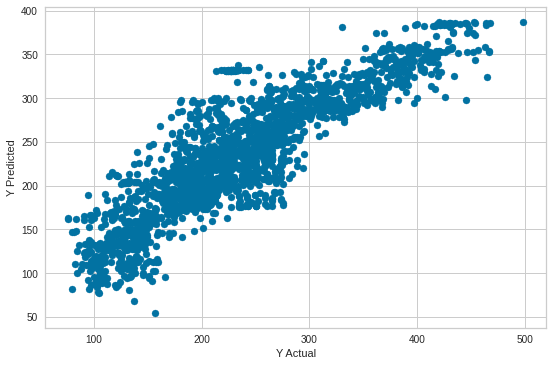

In [ ]:
plt.figure
plt.scatter(y_test, y_lasso_predict)
plt.xlabel('Y Actual')
plt.ylabel('Y Predicted')

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=1)

cnt = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1

Fold:1, Train set: 4339, Test set:1085
Fold:2, Train set: 4339, Test set:1085
Fold:3, Train set: 4339, Test set:1085
Fold:4, Train set: 4339, Test set:1085
Fold:5, Train set: 4340, Test set:1084


In [ ]:
# from sklearn.linear_model import LassoCV

# lasso = LassoCV(alphas=[1], cv=kf).fit(X, y)
# lasso.score(X, y)

In [ ]:
score3 = cross_val_score(lasso, X, y, cv= kf, scoring="r2")
print(f'R2 Scores for each fold: {score3}')
print(np.mean(score3))

R2 Scores for each fold: [0.86534632 0.85951952 0.85003373 0.85296957 0.86338274]
0.8582503766036492


>Dari ketiga hasil regresi menggunakan linear, ridge, dan lasso regression, didapatkan tiga model yang mampu memprediksi harga per square ft suatu apartemen berdasarkan fitur-fitur yang dimiliki dengan performa cukup baik. Ketiga model mampu menghasilkan nilai R squared di atas 0.8 dimana model dengan lasso regression menghasilkan model terbaik dengan nilai R squared 0.858


###c. Lakukan clustering pada data apartemen dan jelaskan karakteristik dari masing-masing cluster!

In [ ]:
#Melakukan normalisasi data
data_encoded2 = data_encoded.copy()
scaler = StandardScaler()
scaler.fit(data_encoded2)

StandardScaler()

In [ ]:
scaled_data = scaler.transform(data_encoded2)
scaled_data

array([[-0.78634391,  0.38314002, -1.95815883, ..., -0.40716482,
        -0.53984125, -0.74012291],
       [-1.65534855, -1.98236383, -1.95815883, ..., -1.51405233,
         1.85239643, -1.76888363],
       [-1.68090893, -1.98236383, -1.95815883, ..., -1.51405233,
         1.85239643, -1.8226725 ],
       ...,
       [ 1.2924704 ,  0.49578306,  1.49550536, ..., -0.18578731,
        -0.53984125,  2.0896005 ],
       [ 0.85796326, -2.77086511,  1.49550536, ...,  0.03559019,
        -0.53984125, -0.00917429],
       [ 1.64177628,  0.49578306,  1.49550536, ..., -0.18578731,
        -0.53984125,  2.58670705]])

####PCA

In [ ]:
# initialize PCA
pca = PCA()

In [ ]:
# Fit the model with "scaled_data".
pca.fit(scaled_data)

PCA()

In [ ]:
trans_pca = pca.transform(scaled_data)

In [ ]:
trans_pca.shape

(5424, 32)

In [ ]:
# explained variants
explained_variants = pca.explained_variance_ratio_
explained_variants[0] + explained_variants[1] + explained_variants[2] + explained_variants[3] + explained_variants[4] + explained_variants[5] + explained_variants[6] + explained_variants[7]
# for i in explained_variants:
#   print(i)

0.7980849974276406

In [ ]:
N_permutations = 1000
variance = np.zeros((N_permutations, len(pd.DataFrame(scaled_data).columns)))

In [ ]:
def de_correlate_df(df):
    X_aux = df.copy()
    for col in df.columns:
        X_aux[col] = df[col].sample(len(df)).values

    return X_aux

In [ ]:
for i in range(N_permutations):
    X_aux = de_correlate_df(pd.DataFrame(scaled_data))

    pca.fit(X_aux)
    variance[i, :] = pca.explained_variance_ratio_

In [ ]:
p_val = np.sum(variance > explained_variants, axis=0) / N_permutations
fig = go.Figure()
fig.add_trace(go.Scatter(x=[f'PC{i}' for i in range(len(pd.DataFrame(scaled_data).columns))], y=p_val, name='p-value on significance'))
fig.update_layout(title="PCA Permutation Test p-values")

In [ ]:
X = data_encoded2.drop(['N_FacilitiesNearBy(Total)'], axis=1) #Menghapus SubwayStation karena tidak relevan
y = data_encoded2['N_FacilitiesNearBy(Total)']

selector = SelectKBest(k=8)
X = selector.fit_transform(X, y)

In [ ]:
selector.get_feature_names_out(input_features=selector.feature_names_in_)

array(['TimeToSubway', 'SubwayStation',
       'N_FacilitiesNearBy(PublicOffice)', 'N_FacilitiesNearBy(ETC)',
       'N_SchoolNearBy(Elementary)', 'N_SchoolNearBy(High)',
       'N_SchoolNearBy(University)', 'N_SchoolNearBy(Total)'],
      dtype=object)

####Silhouette Score dan Elbow Method

Text(0.5, 1.05, 'Visualisasi distribusi data dan scatterplot antar atribut dataset DAE')

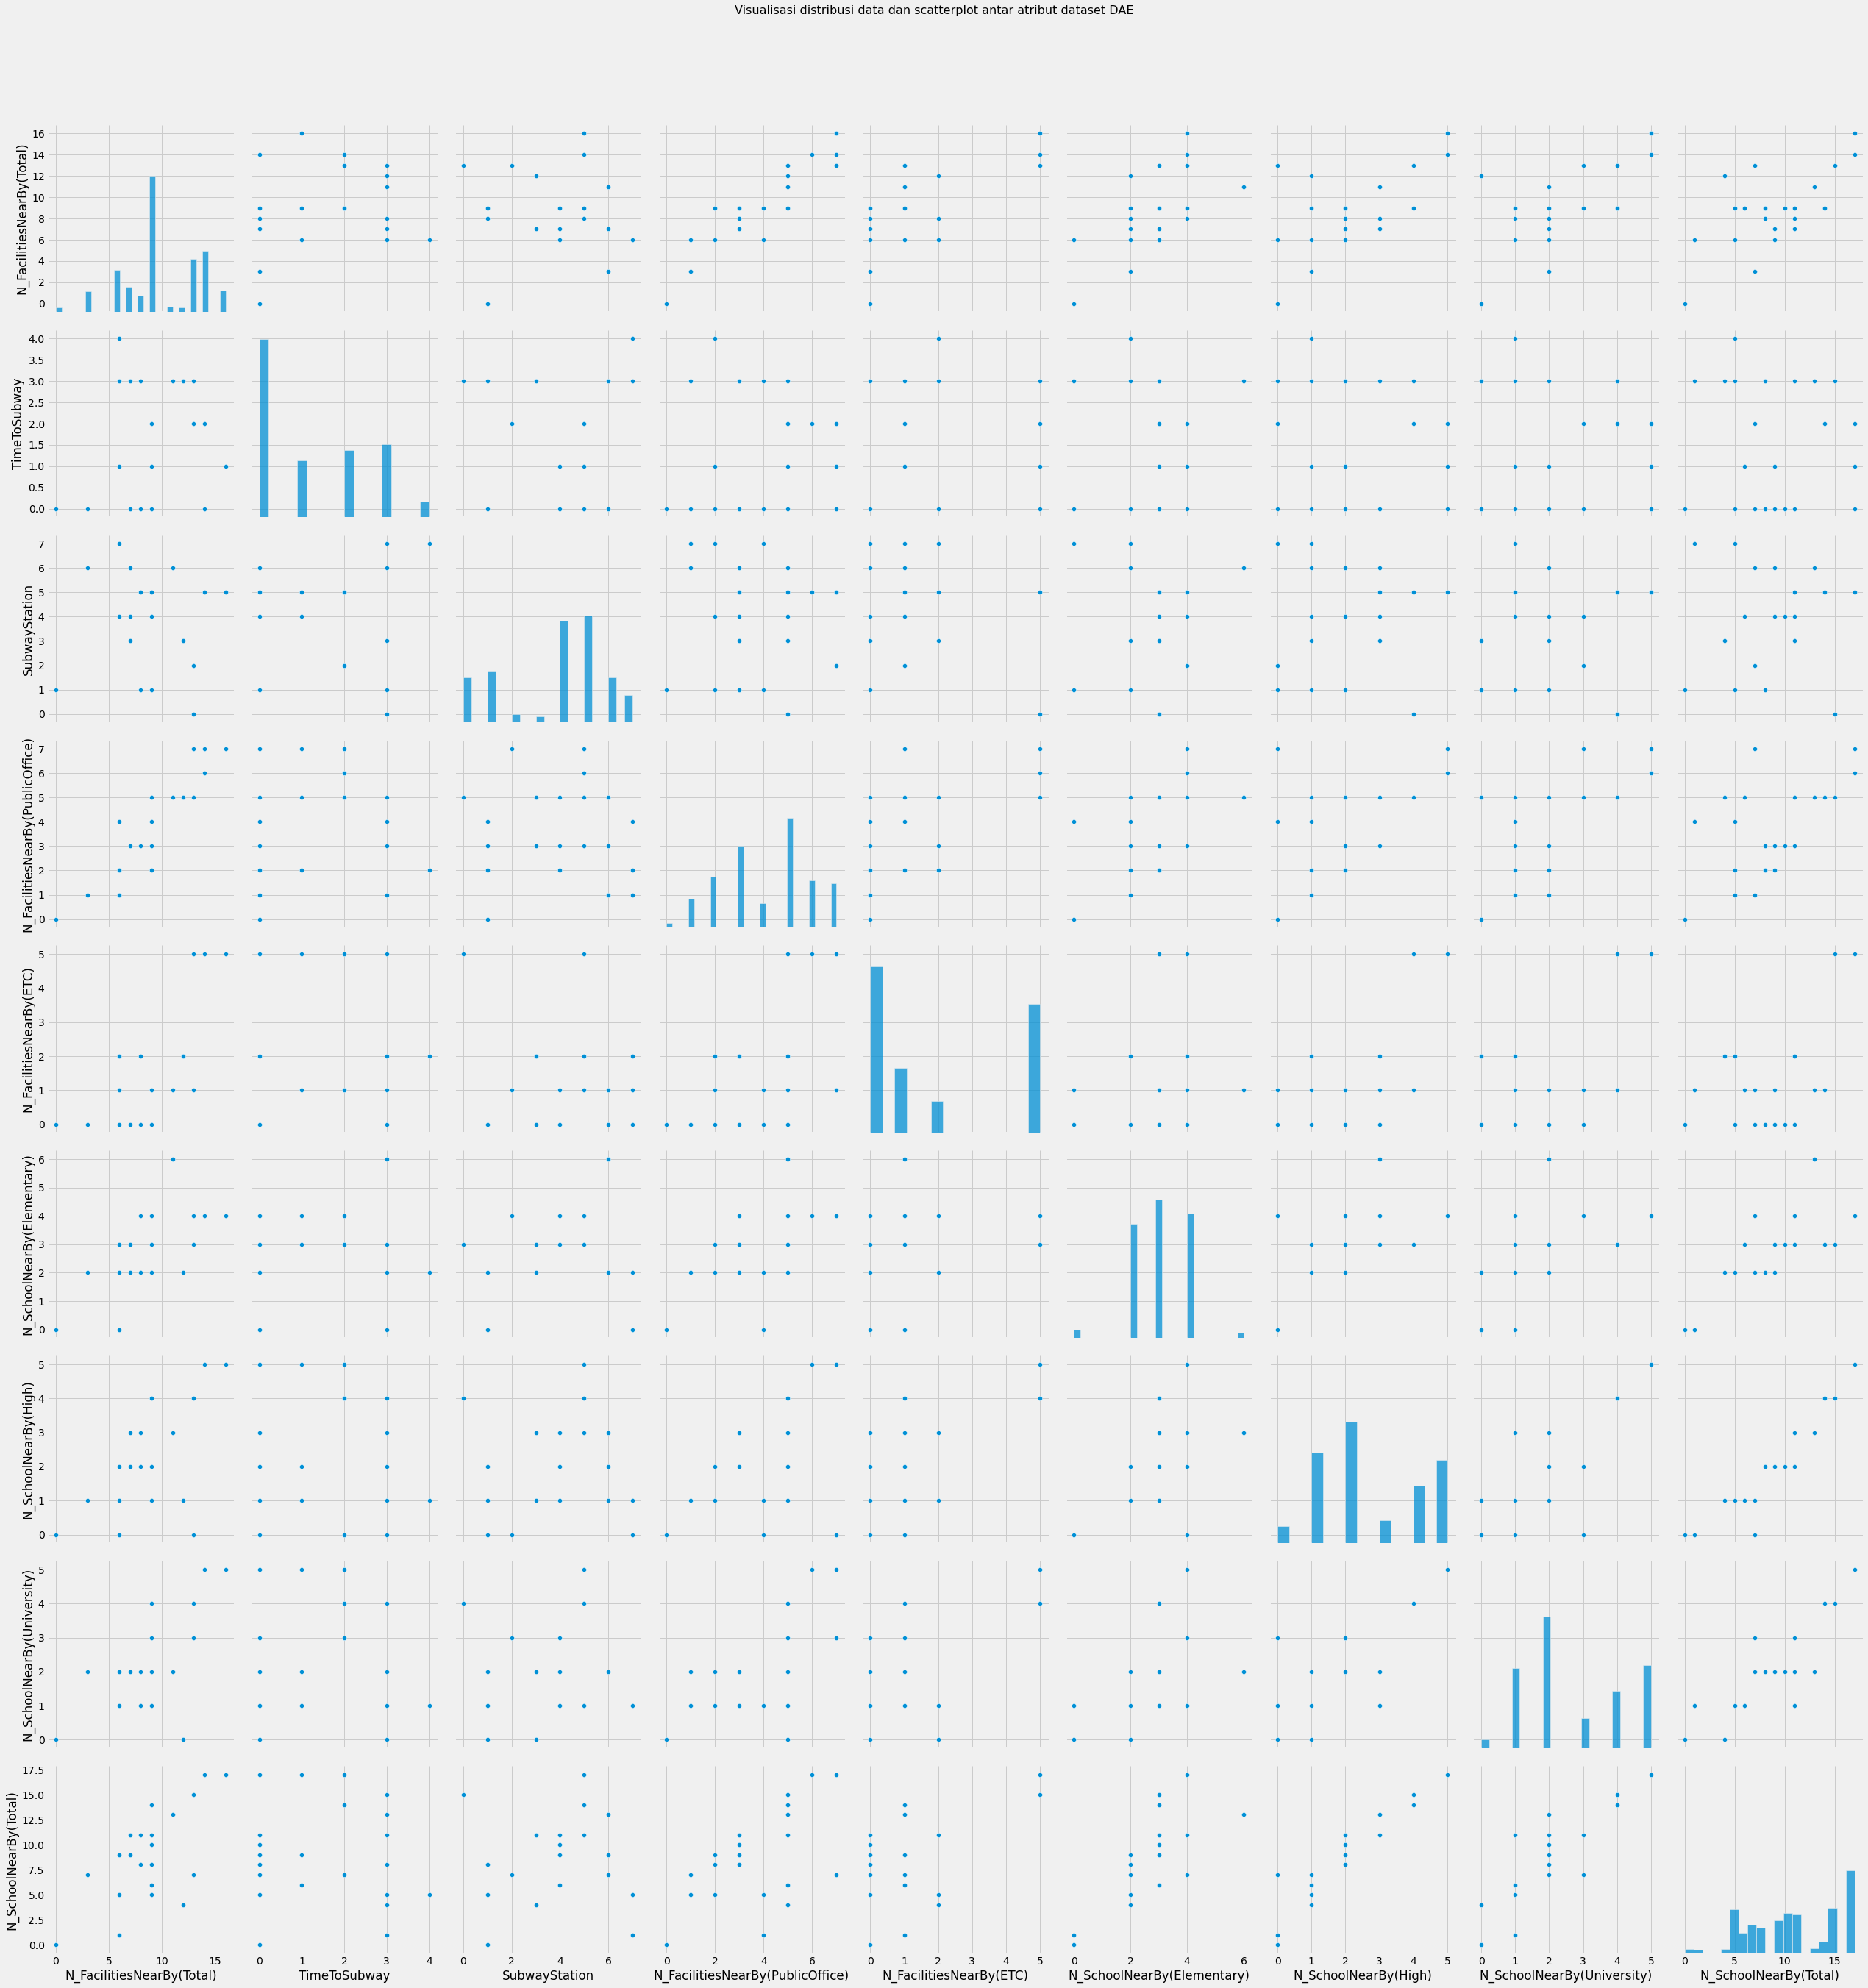

In [ ]:
df_cleaned = data_encoded2[['N_FacilitiesNearBy(Total)','TimeToSubway', 'SubwayStation',
       'N_FacilitiesNearBy(PublicOffice)', 'N_FacilitiesNearBy(ETC)',
       'N_SchoolNearBy(Elementary)', 'N_SchoolNearBy(High)',
       'N_SchoolNearBy(University)', 'N_SchoolNearBy(Total)']].copy()
visualisasi = sns.pairplot(df_cleaned, height=4)
visualisasi.fig.suptitle("Visualisasi distribusi data dan scatterplot antar atribut dataset DAE", y=1.05, size = 16)

In [ ]:
# korelasi data menggunakan pearson
corr_mat = df_cleaned.corr(method='pearson')
corr_mat

corr_mat['N_FacilitiesNearBy(Total)'].sort_values(ascending=False)

N_FacilitiesNearBy(Total)           1.000000
N_FacilitiesNearBy(PublicOffice)    0.899035
N_SchoolNearBy(Total)               0.805270
N_FacilitiesNearBy(ETC)             0.805200
N_SchoolNearBy(University)          0.798612
N_SchoolNearBy(High)                0.790611
N_SchoolNearBy(Elementary)          0.674950
TimeToSubway                        0.296178
SubwayStation                      -0.241038
Name: N_FacilitiesNearBy(Total), dtype: float64

In [ ]:
data_clust = df_cleaned[['N_FacilitiesNearBy(Total)', 'N_SchoolNearBy(Total)']].copy()

>Kami akan melakukan clustering data dengan 2 atribut N_FacilitiesNearBy(Total) dan N_SchoolNearBy(Total). Alasan pemilihan kedua atribut sendiri karena hubungan keduanya cukup memiliki korelasi yang tinggi dan mampu membentuk cluster terhadap data apartemen.

In [ ]:
#Menentukan nilai K dengan silhouette score
from sklearn.metrics import silhouette_samples, silhouette_score

kmax = 6
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(data_clust)
  labels = kmeans.labels_
  print("Untuk n_clusters =",k, ", Rata-rata silhouette score-nya adalah :", silhouette_score(data_clust, labels))

Untuk n_clusters = 2 , Rata-rata silhouette score-nya adalah : 0.6501321200045748
Untuk n_clusters = 3 , Rata-rata silhouette score-nya adalah : 0.5759587537269897
Untuk n_clusters = 4 , Rata-rata silhouette score-nya adalah : 0.5997352790275228
Untuk n_clusters = 5 , Rata-rata silhouette score-nya adalah : 0.6137923408704339
Untuk n_clusters = 6 , Rata-rata silhouette score-nya adalah : 0.6130420937296515


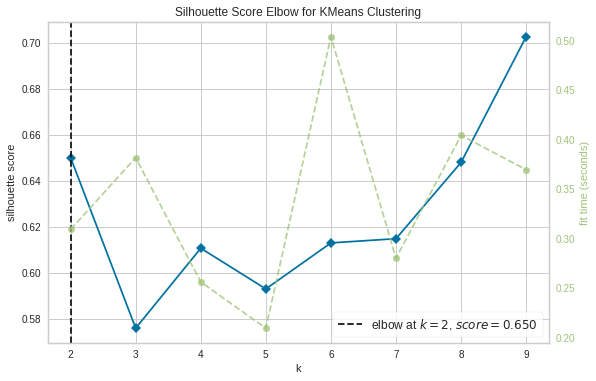

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

modeltes = KMeans()
data = pd.DataFrame(df_cleaned, columns=['N_FacilitiesNearBy(Total)', 'N_SchoolNearBy(Total)'])
visualizer = KElbowVisualizer(modeltes, k=(2,10),metric='silhouette', timings= True)
visualizer.fit(data)
visualizer.show()



> Grafik menunjukkan nilai k = 2 melalui elbow method dan score yang ditunjukkan melalui silhouette score sebesar 0,650.


####Visualisasi Clustering

Text(0, 0.5, 'N_SchoolNearBy(Total)')

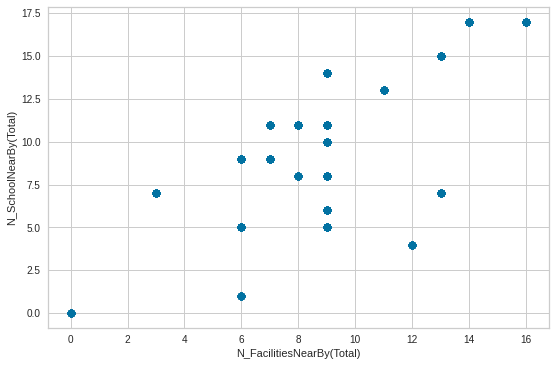

In [ ]:
plt.scatter(data_encoded['N_FacilitiesNearBy(Total)'], data_encoded['N_SchoolNearBy(Total)'])
plt.xlabel('N_FacilitiesNearBy(Total)')
plt.ylabel('N_SchoolNearBy(Total)')

In [ ]:
scaler = StandardScaler()
scaler.fit(data_clust)
df_scaled = scaler.transform(data_clust)
df_scaled

array([[-1.10259955, -0.40716482],
       [ 0.60562666, -1.51405233],
       [ 0.60562666, -1.51405233],
       ...,
       [-0.24848644, -0.18578731],
       [-0.81789518,  0.03559019],
       [-0.24848644, -0.18578731]])

In [ ]:
df_scaled = pd.DataFrame(df_scaled, columns=['N_FacilitiesNearBy(Total)', 'N_SchoolNearBy(Total)'])

In [ ]:
km = KMeans(n_clusters=2)
y_predicted = km.fit_predict(df_scaled[['N_FacilitiesNearBy(Total)', 'N_SchoolNearBy(Total)']])
y_predicted

data_clust['NearBy'] = y_predicted
data_clust

,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total),NearBy
0,6,9,1
1,12,4,1
2,12,4,1
4,14,17,0
5,16,17,0
...,...,...,...
5886,9,10,1
5887,8,11,1
5888,9,10,1
5889,7,11,1


In [ ]:
data_clust['NearBy'].value_counts()

1    3566
0    1858
Name: NearBy, dtype: int64

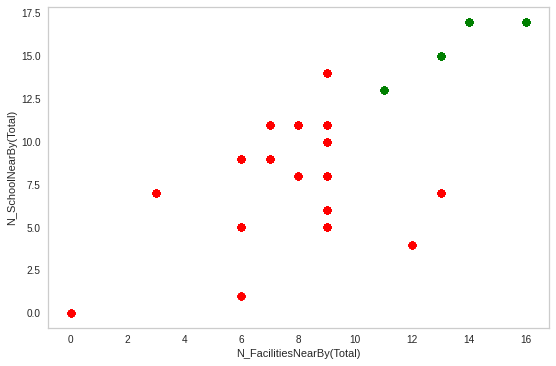

In [ ]:
data_clust1 = data_clust[data_clust['NearBy']==0]
data_clust2 = data_clust[data_clust['NearBy']==1]

plt.scatter(data_clust1['N_FacilitiesNearBy(Total)'], data_clust1['N_SchoolNearBy(Total)'],color='green')
plt.scatter(data_clust2['N_FacilitiesNearBy(Total)'], data_clust2['N_SchoolNearBy(Total)'],color='red')
plt.xlabel('N_FacilitiesNearBy(Total)')
plt.ylabel('N_SchoolNearBy(Total)')
plt.grid()



> <b><i>Jawaban</i></b> : <br>

> Pada tahapan clustering kami menggunakan elbow method untuk mengecek jumlah cluster yang optimum dengan melihat lekuk pada elbow method dan silhouette score berupa hasil akhir ditemukan sebanyak 2 cluster. Selanjutnya, kami melakukan normalisasi dengan menggunakan standardscaler. Setelah itu, dilakukan pendeklarasian variabel sebagai K-Means dengan jumlah cluster yang diinginkan yaitu 2 buah.

> Output dari tabel dataframe ‘data_clust’ termasuk NearBy yang merepresentasikan nilai hasil cluster yaitu 0 dan 1. Pada visualisasi akhir, keterangannya sebagai berikut
- Hijau(Nilai cluster = 0): Apartemen dengan total fasilitas terdekat dan total sekolah terdekat paling sedikit
- Merah(Nilai cluster = 1):  Apartemen dengan total fasilitas terdekat dan total sekolah terdekat paling banyak

> Melalui hasil tersebut dapat disimpulkan bahwa clustering yang kami lakukan dapat menunjukkan hasil berupa total fasilitas terdekat dan total sekolah terdekat dengan 2 intensitas yaitu apartemen dengan jumlah NearBy paling sedikit dan paling banyak.
